## Chapter 2-3, 2. ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Î™®Îç∏ÎßÅ ‚Äî ÌöåÍ∑Ä(ÏÑ†Ìòï/ÎûúÎç§Ìè¨Î†àÏä§Ìä∏), ÏãúÍ≥ÑÏó¥ Ï†ÑÏö©(SARIMA/Prophet), Îî•Îü¨Îãù(LSTM) (Bike Sharing)

- **Î™©Ìëú**: ÌöåÍ∑Ä(ÏÑ†Ìòï/ÎûúÎç§Ìè¨Î†àÏä§Ìä∏), ÏãúÍ≥ÑÏó¥ Ï†ÑÏö©(SARIMA/Prophet), Îî•Îü¨Îãù(LSTM) Î™®Îç∏ÏùÑ Îã®Í≥ÑÎ≥ÑÎ°ú ÌïôÏäµ¬∑ÌèâÍ∞ÄÌïòÏó¨ ÎπÑÍµêÌï©ÎãàÎã§.
- **Îç∞Ïù¥ÌÑ∞**: Kaggle Bike Sharing Demand (ÏãúÍ∞Ñ Îã®ÏúÑ, `count` ÎåÄÏÉÅ)
- **Í∑úÏπô(Í∞ïÏùòÏö©)**: `matplotlib`Îßå ÏÇ¨Ïö© (seaborn X), ÏÉâÏÉÅ ÏßÄÏ†ï X, ÏÑúÎ∏åÌîåÎ°Ø X


#### Íµ¨ÏÑ±
- ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°Ïùò Ï§ëÏöîÏÑ±Í≥º ÌôúÏö©: ÏàòÏöî/Ïû¨Í≥†/Ïù∏Î†•/ÍµêÌÜµ/ÏóêÎÑàÏßÄ Îì±
- ÏùºÎ∞ò ÌöåÍ∑Ä vs ÏãúÍ≥ÑÏó¥ Î™®Îç∏ Ï∞®Ïù¥: IID Í∞ÄÏ†ï vs ÏûêÍ∏∞ÏÉÅÍ¥Ä/Í≥ÑÏ†àÏÑ±/Ï∂îÏÑ∏
- Ïã§ÏäµÏùÑ ÌÜµÌïú Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ÌïôÏäµ Î∞è Ìï¥ÏÑù


### 0. ÌôòÍ≤Ω Ï§ÄÎπÑ Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

- ÏãúÍ∞ÅÌôîÎäî `matplotlib`Îßå ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- ÌöåÍ∑Ä Î™®Îç∏(`scikit-learn`), ÏãúÍ≥ÑÏó¥(`statsmodels`), Prophet(ÏÑ†ÌÉù)ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- ÌïúÍ∏Ä Ìè∞Ìä∏ÏôÄ Í≤ΩÍ≥† ÏñµÏ†úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.


In [1]:
# -*- coding: utf-8 -*-
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

try:
    from prophet import Prophet
    _HAS_PROPHET = True
except Exception:
    _HAS_PROPHET = False

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message=r"Glyph.*missing from font.*", category=UserWarning)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Î∞è ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ (ÌõÑÎ≥¥Íµ∞ÏùÑ sans-serif Ïö∞ÏÑ†ÏàúÏúÑÎ°ú ÏßÄÏ†ï)
def _set_korean_font() -> None:
    font_candidates = [
        "AppleGothic",
        "NanumGothic",
        "Malgun Gothic",
        "Noto Sans CJK KR",
        "Noto Sans KR",
        "DejaVu Sans",
    ]
    # Ïö∞ÏÑ†ÏàúÏúÑ Î¶¨Ïä§Ìä∏Î•º Í∑∏ÎåÄÎ°ú Îì±Î°ùÌïòÏó¨ ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ìï≠Î™©ÏúºÎ°ú ÎåÄÏ≤¥ÎêòÎèÑÎ°ù Ìï®
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = font_candidates
    plt.rcParams["axes.unicode_minus"] = False

_set_korean_font()

pd.set_option('display.max_columns', 100)


/Users/kimjinseok/Desktop/metacode-lecture/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Ï†ÑÏ≤òÎ¶¨
- `bike-sharing-demand/train.csv` Î°úÎìú, `datetime` ÌååÏã±/Ï†ïÎ†¨
- ÏãúÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±(ÎÖÑ/Ïõî/Ïùº/ÏöîÏùº/ÏãúÍ∞Ñ)
- ÏãúÍ∞Ñ ÏàúÏÑúÎåÄÎ°ú train/val/test Î∂ÑÌï†


In [2]:
def load_hourly_data():
    # Îç∞Ïù¥ÌÑ∞ ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
    path = 'bike-sharing-demand/train.csv'
    
    # ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ ÏóêÎü¨ Î∞úÏÉù
    if not os.path.exists(path):
        raise FileNotFoundError('train.csv Í≤ΩÎ°úÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.')
    
    # CSV ÌååÏùºÏùÑ Î∂àÎü¨Ïò§Í∏∞
    df = pd.read_csv(path)
    
    # datetime Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # ÏãúÍ∞Ñ ÏàúÏúºÎ°ú Ï†ïÎ†¨ ÌõÑ Ïù∏Îç±Ïä§ Ïû¨ÏÑ§Ï†ï
    df = df.sort_values('datetime').reset_index(drop=True)
    
    # ÏÇ¨Ïö©Ìï† Ïª¨ÎüºÎßå ÏÑ†ÌÉù
    cols = ['datetime','season','holiday','workingday','weather',
            'temp','atemp','humidity','windspeed',
            'casual','registered','count']
    return df[cols]


def add_time_features(df: pd.DataFrame) -> pd.DataFrame:
    # ÏûÖÎ†•Îêú DataFrameÏùÑ Î≥µÏÇ¨ÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    out = df.copy()
    
    # datetimeÏóêÏÑú ÌååÏÉùÎêú ÏãúÍ∞Ñ Í¥ÄÎ†® ÌäπÏßï Ï∂îÍ∞Ä
    out['year'] = out['datetime'].dt.year        # Ïó∞ÎèÑ
    out['month'] = out['datetime'].dt.month      # Ïõî
    out['day'] = out['datetime'].dt.day          # Ïùº
    out['dayofweek'] = out['datetime'].dt.dayofweek  # ÏöîÏùº (0=ÏõîÏöîÏùº, 6=ÏùºÏöîÏùº)
    out['hour'] = out['datetime'].dt.hour        # Ïãú(hour)
    
    return out


def split_by_time(df: pd.DataFrame, train_ratio: float = 0.8, val_ratio: float = 0.1):
    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞
    n = len(df)
    
    # ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
    n_train = int(n * train_ratio)
    n_val = int(n * val_ratio)
    
    # ÏãúÍ∞Ñ ÏàúÏúºÎ°ú train/val/test ÎÇòÎàÑÍ∏∞
    train = df.iloc[:n_train]                    # ÏïûÎ∂ÄÎ∂Ñ ‚Üí train
    val = df.iloc[n_train:n_train+n_val]         # Ï§ëÍ∞Ñ ‚Üí validation
    test = df.iloc[n_train+n_val:]               # ÎÇòÎ®∏ÏßÄ ‚Üí test
    
    return train, val, test


# --- Ïã§Ìñâ Î∂ÄÎ∂Ñ ---

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = load_hourly_data()
print('Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:', df.shape, 'Í∏∞Í∞Ñ:', df['datetime'].min(), '‚Üí', df['datetime'].max())

# ÏãúÍ∞Ñ ÌååÏÉù Î≥ÄÏàò Ï∂îÍ∞Ä
df_feat = add_time_features(df)

# Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ (Ïïû/Îí§ Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞)
df = df.ffill().bfill()

# train, validation, test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
train_df, val_df, test_df = split_by_time(df_feat)


Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (10886, 12) Í∏∞Í∞Ñ: 2011-01-01 00:00:00 ‚Üí 2012-12-19 23:00:00


### 2-1. ÏùºÎ∞ò ÌöåÍ∑Ä Î≤†Ïù¥Ïä§ÎùºÏù∏: ÏÑ†Ìòï ÌöåÍ∑Ä vs ÎûúÎç§Ìè¨Î†àÏä§Ìä∏
- ÏûÖÎ†•: ÏãúÍ∞Ñ ÌååÏÉù + Í∏∞ÏÉÅ/ÏÉÅÌÉú Î≥ÄÏàò, ÌÉÄÍπÉ: `count`
- ÌèâÍ∞Ä: MAE/MSE/RMSE/R^2


In [3]:
def to_supervised_features(df: pd.DataFrame, target: str = 'count'):
    # ÏÇ¨Ïö©Ìï† Í∏∞Î≥∏ ÌäπÏßï Ïª¨Îüº Ï†ïÏùò
    feature_cols = [
        'season','holiday','workingday','weather',
        'temp','atemp','humidity','windspeed',
        'year','month','day','dayofweek','hour'
    ]
    
    # ÌäπÏßï Î≥ÄÏàò(X) ÏÑ†ÌÉù
    X = df[feature_cols].copy()
    
    # Î≤îÏ£ºÌòï Î≥ÄÏàò(season, holiday, workingday, weather, year, month, dayofweek, hour)Î•º Ïõê-Ìï´ Ïù∏ÏΩîÎî©
    # drop_first=False : Ï≤´ Î≤àÏß∏ Ïπ¥ÌÖåÍ≥†Î¶¨ÎèÑ Ïú†ÏßÄ (Î™®Îì† ÎçîÎØ∏ Î≥ÄÏàòÎ•º Ìè¨Ìï®)
    X = pd.get_dummies(
        X, 
        columns=['season','holiday','workingday','weather','year','month','dayofweek','hour'], 
        drop_first=False
    )
    
    # ÌÉÄÍ≤ü Î≥ÄÏàò(y) ÏÑ†ÌÉù (floatÌòïÏúºÎ°ú Î≥ÄÌôò)
    y = df[target].astype(float)
    
    return X, y


def compute_metrics(y_true, y_pred):
    # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    mae  = float(mean_absolute_error(y_true, y_pred))  # ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
    mse  = float(mean_squared_error(y_true, y_pred))   # ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
    rmse = float(np.sqrt(mse))                         # RMSE = MSEÏùò Ï†úÍ≥±Í∑º
    r2   = r2_score(y_true, y_pred)                    # Í≤∞Ï†ïÍ≥ÑÏàò (ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
    
    # Í≤∞Í≥º Ï∂úÎ†•
    print("[Metrics]")
    print(f"MAE  : {mae:.6f} - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®")
    print(f"MSE  : {mse:.6f} - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®")
    print(f"RMSE : {rmse:.6f} - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®")
    print(f"R^2  : {r2:.6f} - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)")
    
    return mae, mse, rmse, r2


def plot_actual_vs_pred(dt_index, y_true, y_pred, title):
    # Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÏãúÍ≥ÑÏó¥ ÎπÑÍµê ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12,4))
    plt.plot(dt_index, y_true, label='Actual')   # Ïã§Ï†úÍ∞í
    plt.plot(dt_index, y_pred, label='Pred')     # ÏòàÏ∏°Í∞í
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.legend()
    plt.tight_layout()
    plt.show()


# -----------------------------
# Train / Validation / Test Îç∞Ïù¥ÌÑ∞Î≥Ñ ÌäπÏßï ÏÉùÏÑ±
# -----------------------------
X_train, y_train = to_supervised_features(train_df)  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
X_val, y_val     = to_supervised_features(val_df)    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_test, y_test   = to_supervised_features(test_df)   # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉùÏÑ±Îêú Ïª¨Îüº Íµ¨Ï°∞Ïóê ÎßûÏ∂îÏñ¥ Validation/Test Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ï
# ‚Üí ÌïôÏäµ Îïå ÎÇòÏò® Ïª¨ÎüºÍ≥º Validation/Test Ïª¨ÎüºÏù¥ ÎèôÏùºÌï¥Ïïº Ìï®
# ‚Üí ÏóÜÎäî Ïª¨ÎüºÏùÄ fill_value=0 ÏúºÎ°ú Ï±ÑÏõÄ
X_val  = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


[Metrics]
MAE  : 112.461157 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 21701.572466 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 147.314536 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.611101 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
Linear/VAL (112.46115659982183, 21701.5724664791, 147.3145358288825, 0.6111009463256456)
[Metrics]
MAE  : 84.412417 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 12720.204474 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 112.783884 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.662295 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
Linear/TEST (84.41241701047062, 12720.204474477732, 112.78388393062961, 0.6622946885094285)


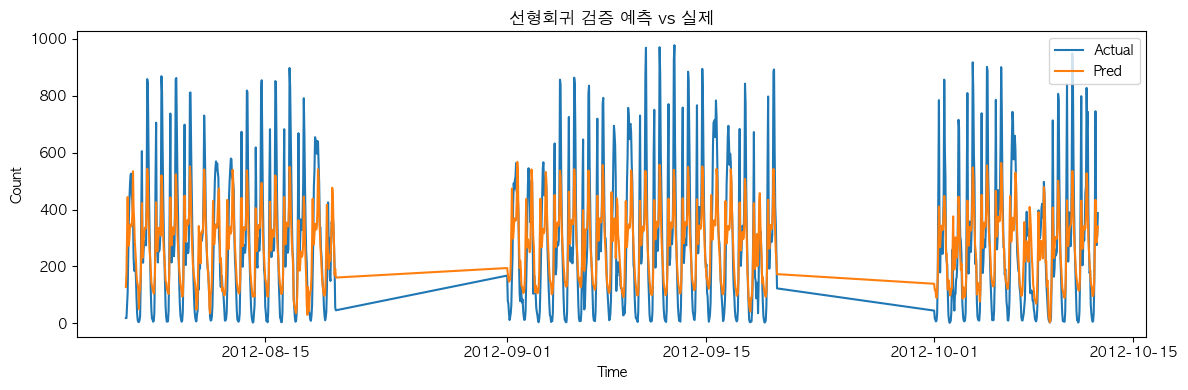

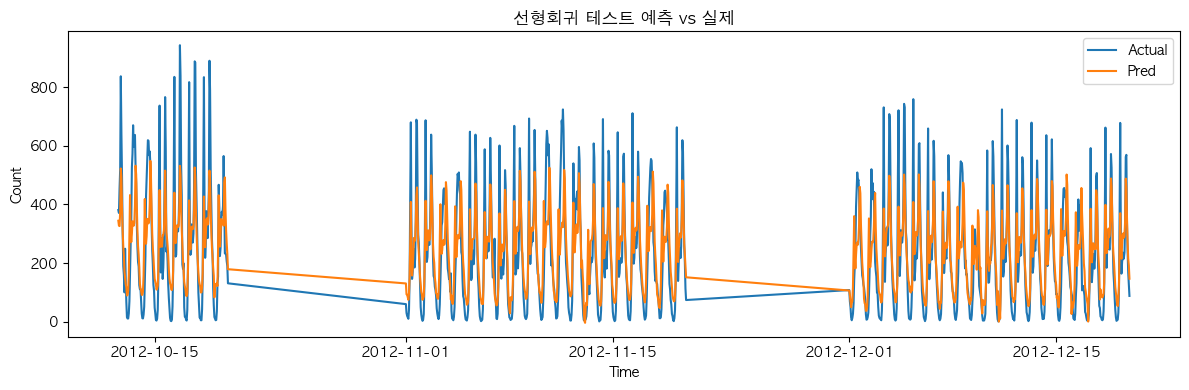

[Metrics]
MAE  : 59.311357 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 8326.449294 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 91.249380 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.850787 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
RF/VAL (59.31135723039216, 8326.449294475082, 91.2493796936455, 0.8507873908173891)
[Metrics]
MAE  : 68.762976 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 10117.330518 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 100.584942 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.731398 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
RF/TEST (68.76297553516821, 10117.330518318044, 100.58494180700232, 0.7313976940388813)


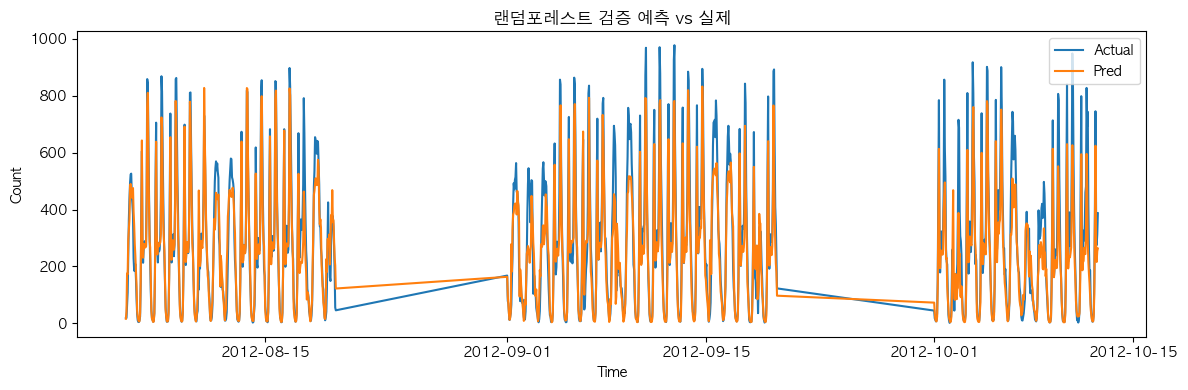

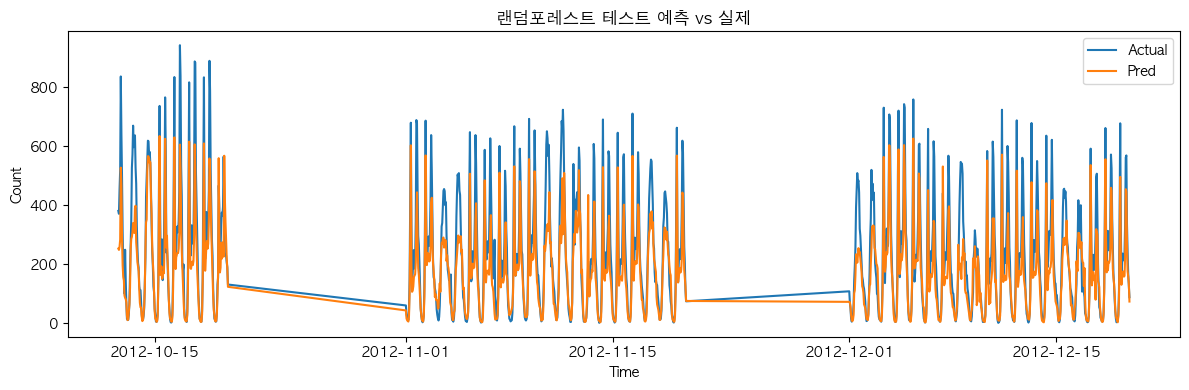

RF Ï§ëÏöîÎèÑ TOP 15:
 atemp           0.186645
hour_17         0.094062
humidity        0.084904
hour_18         0.079720
hour_8          0.055163
workingday_0    0.047907
workingday_1    0.047481
temp            0.041277
year_2011       0.030997
year_2012       0.030407
hour_19         0.030261
hour_7          0.016440
hour_2          0.015388
hour_1          0.015234
day             0.014464
dtype: float64


In [4]:
# -----------------------------
# ÏÑ†Ìòï ÌöåÍ∑Ä (Linear Regression)
# -----------------------------
from sklearn.linear_model import LinearRegression

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ (train Îç∞Ïù¥ÌÑ∞Î°ú Ï†ÅÌï©)
lin = LinearRegression().fit(X_train, y_train)

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
lin_val_pred  = lin.predict(X_val)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
lin_test_pred = lin.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä (Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏)
print('Linear/VAL', compute_metrics(y_val.to_numpy(), lin_val_pred))   # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏßÄÌëú
print('Linear/TEST', compute_metrics(y_test.to_numpy(), lin_test_pred)) # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏßÄÌëú

# Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî (Í≤ÄÏ¶ù)
plot_actual_vs_pred(
    val_df['datetime'].values, y_val.to_numpy(), lin_val_pred, 
    'ÏÑ†ÌòïÌöåÍ∑Ä Í≤ÄÏ¶ù ÏòàÏ∏° vs Ïã§Ï†ú'
)

# Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî (ÌÖåÏä§Ìä∏)
plot_actual_vs_pred(
    test_df['datetime'].values, y_test.to_numpy(), lin_test_pred, 
    'ÏÑ†ÌòïÌöåÍ∑Ä ÌÖåÏä§Ìä∏ ÏòàÏ∏° vs Ïã§Ï†ú'
)


# -----------------------------
# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä (RandomForestRegressor)
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=300,   # Ìä∏Î¶¨ Í∞úÏàò (Í∏∞Î≥∏Í∞íÎ≥¥Îã§ ÌÅ¨Í≤å ÏÑ§Ï†ï ‚Üí ÏÑ±Îä• ÏïàÏ†ïÌôî)
    n_jobs=-1,          # CPU ÏΩîÏñ¥ Î™®Îëê ÏÇ¨Ïö©
    random_state=42     # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÏãúÎìú Í≥†Ï†ï
)

# Î™®Îç∏ ÌïôÏäµ
rf.fit(X_train, y_train)

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
rf_val_pred = rf.predict(X_val)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
rf_test_pred = rf.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä (Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏)
print('RF/VAL', compute_metrics(y_val.to_numpy(), rf_val_pred))   # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏßÄÌëú
print('RF/TEST', compute_metrics(y_test.to_numpy(), rf_test_pred)) # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏßÄÌëú

# Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî (Í≤ÄÏ¶ù)
plot_actual_vs_pred(
    val_df['datetime'].values, y_val.to_numpy(), rf_val_pred, 
    'ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Í≤ÄÏ¶ù ÏòàÏ∏° vs Ïã§Ï†ú'
)

# Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî (ÌÖåÏä§Ìä∏)
plot_actual_vs_pred(
    test_df['datetime'].values, y_test.to_numpy(), rf_test_pred, 
    'ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌÖåÏä§Ìä∏ ÏòàÏ∏° vs Ïã§Ï†ú'
)


# -----------------------------
# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌäπÏßï Ï§ëÏöîÎèÑ ÌôïÏù∏
# -----------------------------
try:
    # feature_importances_ ÏÜçÏÑ±ÏùÑ Ïù¥Ïö©Ìï¥ Î≥ÄÏàò Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
    importances = (
        pd.Series(rf.feature_importances_, index=X_train.columns)
        .sort_values(ascending=False)
    )
    
    # ÏÉÅÏúÑ 15Í∞ú ÌäπÏßï Ï∂úÎ†•
    print('RF Ï§ëÏöîÎèÑ TOP 15:\n', importances.head(15))
except Exception:
    # ÎßåÏïΩ feature_importances_Í∞Ä ÏóÜÍ±∞ÎÇò Ïò§Î•ò Î∞úÏÉù Ïãú Î¨¥Ïãú
    pass



### 2-2. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî & ÏãúÍ≥ÑÏó¥ ÍµêÏ∞®Í≤ÄÏ¶ù
- `TimeSeriesSplit`ÏùÑ Ïù¥Ïö©Ìïú ÍµêÏ∞®Í≤ÄÏ¶ù
- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Í∞ÑÎã® Grid Search


In [5]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
#from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# 0) Ï†ÑÏ≤¥ ÌîºÏ≤ò/ÌÉÄÍπÉ ÏÉùÏÑ±
# -----------------------------
X_all_ts, y_all_ts = to_supervised_features(df_feat)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÏßï(X), ÌÉÄÍπÉ(y) ÏÉùÏÑ±

# (ÏÑ†ÌÉù) Ïù∏Îç±Ïä§Í∞Ä ÏÑûÏó¨ ÏûàÎã§Î©¥ ÏãúÍ∞ÑÏàú Ï†ïÎ†¨ ÌïÑÏöî
# X_all_ts = X_all_ts.sort_index()
# y_all_ts = y_all_ts.loc[X_all_ts.index]

# -----------------------------
# 1) ÌôÄÎìúÏïÑÏõÉ Î∂ÑÌï† (ÎßàÏßÄÎßâ 20%Î•º ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú Î≥¥Ï°¥)
# -----------------------------
split_idx = int(len(X_all_ts) * 0.8)   # 80% ÏãúÏ†ê Í∏∞Ï§Ä Î∂ÑÌï†

# ÍµêÏ∞®Í≤ÄÏ¶ù(CV)Ïóê ÏÇ¨Ïö©Ìï† Íµ¨Í∞Ñ
X_cv_ts,  y_cv_ts   = X_all_ts.iloc[:split_idx], y_all_ts.iloc[:split_idx]

# ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ (ÌïôÏäµ/ÌäúÎãùÏóê ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùå ‚Üí ÏôÑÏ†Ñ unseen data)
X_test_ts, y_test_ts = X_all_ts.iloc[split_idx:], y_all_ts.iloc[split_idx:]

print(f"[SHAPE] X_cv_ts={X_cv_ts.shape}, y_cv_ts={y_cv_ts.shape}, "
      f"X_test_ts={X_test_ts.shape}, y_test_ts={y_test_ts.shape}")


# -----------------------------
# 2) ÏãúÍ≥ÑÏó¥ ÍµêÏ∞®Í≤ÄÏ¶ù Î∂ÑÌï†Í∏∞ (TimeSeriesSplit)
# -----------------------------
# ÏùºÎ∞ò KFoldÏôÄ Îã¨Î¶¨, ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏóê Ïì∞ÏßÄ ÏïäÎèÑÎ°ù ÏãúÍ∞Ñ ÏàúÏÑúÎ•º Î≥¥Ï°¥ÌïòÎäî Î∞©Ïãù
tscv_cv = TimeSeriesSplit(n_splits=5)  # 5Í≤π ÏãúÍ≥ÑÏó¥ ÍµêÏ∞®Í≤ÄÏ¶ù


# -----------------------------
# 3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú & GridSearchCV Í∞ùÏ≤¥ ÏÉùÏÑ±
# -----------------------------
param_grid_rf = {
    "n_estimators": [200, 300],   # Ìä∏Î¶¨ Í∞úÏàò
    "max_depth": [None, 12, 24]   # Ìä∏Î¶¨ ÍπäÏù¥
}

# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Í∏∞Î≥∏ Î™®Îç∏
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCVÎ°ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
rf_gs_cv = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    cv=tscv_cv,                          # ÏãúÍ≥ÑÏó¥ Î∂ÑÌï†Í∏∞Î°ú ÍµêÏ∞®Í≤ÄÏ¶ù
    scoring='neg_root_mean_squared_error',  # RMSE (scikit-learnÏùÄ ÏùåÏàòÎ°ú Î∞òÌôò)
    n_jobs=-1                            # Î≥ëÎ†¨ Ï≤òÎ¶¨
)


# -----------------------------
# 4) CV Íµ¨Í∞Ñ Îç∞Ïù¥ÌÑ∞Î°ú Í∑∏Î¶¨ÎìúÏÑúÏπò Ïã§Ìñâ
# -----------------------------
rf_gs_cv.fit(X_cv_ts, y_cv_ts)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î∞è ÍµêÏ∞®Í≤ÄÏ¶ù RMSE Ï∂úÎ†•
print('ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(CV):', rf_gs_cv.best_params_)
print('CV RMSE:', -rf_gs_cv.best_score_)  # neg RMSE ‚Üí Î∂ÄÌò∏ Î∞òÏ†Ñ


# -----------------------------
# 5) ÏµúÏ†Å Î™®Îç∏ÏùÑ CV Íµ¨Í∞Ñ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ
# -----------------------------
rf_best_cv_ts = rf_gs_cv.best_estimator_
rf_best_cv_ts.fit(X_cv_ts, y_cv_ts)


# -----------------------------
# 6) ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ÏÖã ÌèâÍ∞Ä (ÌôÄÎìúÏïÑÏõÉ)
# -----------------------------
y_pred_test_ts = rf_best_cv_ts.predict(X_test_ts)

# ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mae_ts  = mean_absolute_error(y_test_ts, y_pred_test_ts)
mse_ts  = mean_squared_error(y_test_ts, y_pred_test_ts)
rmse_ts = np.sqrt(mse_ts)
r2_ts   = r2_score(y_test_ts, y_pred_test_ts)

print("\n[TEST Metrics - Time Series Holdout]")
print(f"MAE  : {mae_ts:.3f}")
print(f"MSE  : {mse_ts:.3f}")
print(f"RMSE : {rmse_ts:.3f}")
print(f"R^2  : {r2_ts:.3f}")



[SHAPE] X_cv_ts=(8708, 62), y_cv_ts=(8708,), X_test_ts=(2178, 62), y_test_ts=(2178,)
ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(CV): {'max_depth': None, 'n_estimators': 200}
CV RMSE: 93.78490562597392

[TEST Metrics - Time Series Holdout]
MAE  : 63.831
MSE  : 9158.992
RMSE : 95.703
R^2  : 0.807


In [6]:
def plot_timeseries_split(n_samples=30, n_splits=5):
    """
    TimeSeriesSplitÏù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïñ¥ÎñªÍ≤å Î∂ÑÌï†ÌïòÎäîÏßÄ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï£ºÎäî Ìï®Ïàò
    
    Parameters%
    ----------
    n_samples : int
        Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Ïàò (Ïòà: len(X_all))
    n_splits : int
        TimeSeriesSplitÏùò Î∂ÑÌï† Í∞úÏàò (fold Ïàò)
    """
    # ÏÉòÌîå Ïù∏Îç±Ïä§ (0 ~ n_samples-1 ÍπåÏßÄ)
    X = range(n_samples)
    
    # ÏãúÍ≥ÑÏó¥ ÍµêÏ∞®Í≤ÄÏ¶ù Î∂ÑÌï†Í∏∞ ÏÉùÏÑ±
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏßÄÏ†ï
    plt.figure(figsize=(12, 6))

    # TimeSeriesSplitÏóêÏÑú foldÎ≥Ñ train/test Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
        # üîπ Train Î∂ÄÎ∂Ñ (ÌååÎûÄÏÉâ Ïõê)
        plt.scatter(
            train_idx,                # ÌõàÎ†® Ïù∏Îç±Ïä§
            [fold]*len(train_idx),    # yÏ∂ïÏùÄ fold Î≤àÌò∏Î°ú Í≥†Ï†ï
            marker='o', color='blue', s=40,
            label='Train' if fold == 1 else ""  # Ï≤´ Î≤àÏß∏ foldÎßå Î≤îÎ°Ä Ï∂îÍ∞Ä
        )
        
        # üîπ Test Î∂ÄÎ∂Ñ (Îπ®Í∞ÑÏÉâ Ïõê)
        plt.scatter(
            test_idx, 
            [fold]*len(test_idx), 
            marker='o', color='red', s=40,
            label='Test' if fold == 1 else ""   # Ï≤´ Î≤àÏß∏ foldÎßå Î≤îÎ°Ä Ï∂îÍ∞Ä
        )

    # yÏ∂ï: Fold Î≤àÌò∏ ÌëúÏãú
    plt.yticks(range(1, n_splits+1), [f"Fold {i}" for i in range(1, n_splits+1)])
    
    # xÏ∂ï/ yÏ∂ï ÎùºÎ≤®
    plt.xlabel("Index (ÏãúÍ∞Ñ ÏàúÏÑú)")
    plt.ylabel("CV Fold")
    
    # Í∑∏ÎûòÌîÑ Ï†úÎ™©
    plt.title(f"TimeSeriesSplit ÏãúÍ∞ÅÌôî (ÏÉòÌîå {n_samples}, Î∂ÑÌï† {n_splits})")
    
    # Î≤îÎ°Ä Î∞è Í∑∏Î¶¨Îìú ÌëúÏãú
    plt.legend()
    plt.grid(True)
    
    # Ï∂úÎ†•
    plt.show()


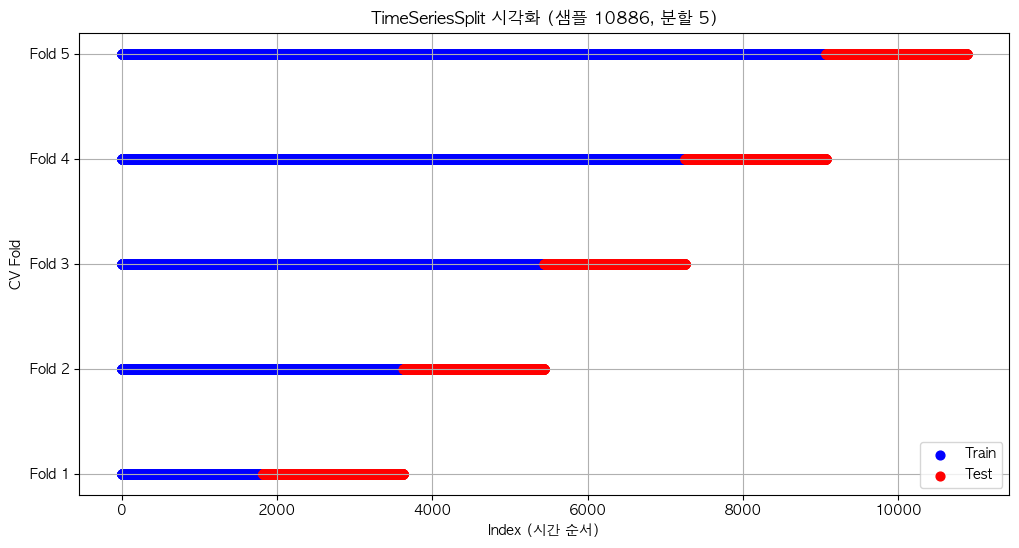

In [7]:
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©Ìï† Í≤ΩÏö∞
plot_timeseries_split(n_samples=X_all_ts.shape[0], n_splits=5)

### 2-3. ÏïôÏÉÅÎ∏î Î™®Îç∏ÎßÅ (Í∞ÄÏ§ë ÌèâÍ∑†)
- ÏÑ†ÌòïÌöåÍ∑ÄÏôÄ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò Í≤ÄÏ¶ù ÏòàÏ∏°ÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†
- Í≤ÄÏ¶ù ÏÑ±Îä•ÏúºÎ°ú Í∞ÄÏ§ëÏπò ÏÑ†ÌÉù ÌõÑ ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä


[Metrics]
MAE  : 59.311357 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 8326.449294 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 91.249380 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.850787 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
[Metrics]
MAE  : 60.226095 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 8501.793626 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 92.205171 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.847645 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
[Metrics]
MAE  : 61.818753 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 8729.076045 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 93.429524 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.843572 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
[Metrics]
MAE  : 63.734434 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 9008.296552 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 94.912046 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.838568 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
[Metrics]
MAE  : 65.902910 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 9339.455145 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 96.640856 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.832634 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
[Metrics]


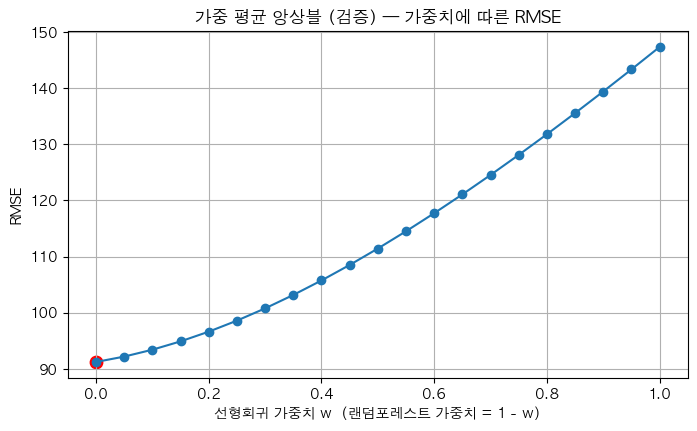


[Í≤ÄÏ¶ù Í≤∞Í≥º ÏÉÅÏúÑ 5Í∞ú (RMSE Í∏∞Ï§Ä)]
 w(linear)  w(rf)  linear%  rf%    MAE   RMSE    R2
     0.000  1.000        0  100 59.311 91.249 0.851
     0.050  0.950        5   95 60.226 92.205 0.848
     0.100  0.900       10   90 61.819 93.430 0.844
     0.150  0.850       15   85 63.734 94.912 0.839
     0.200  0.800       20   80 65.903 96.641 0.833
[Metrics]
MAE  : 68.762976 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 10117.330518 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 100.584942 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.731398 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)

[ÏöîÏïΩ]
- ÏµúÏ†Å Í∞ÄÏ§ëÏπò w = 0.00  (ÏÑ†ÌòïÌöåÍ∑Ä 0%, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ 100%)
- Í≤ÄÏ¶ù RMSE = 91.249
- ÌÖåÏä§Ìä∏ ÏÑ±Îä• ‚Üí MAE=68.763, RMSE=100.585, R^2=0.731


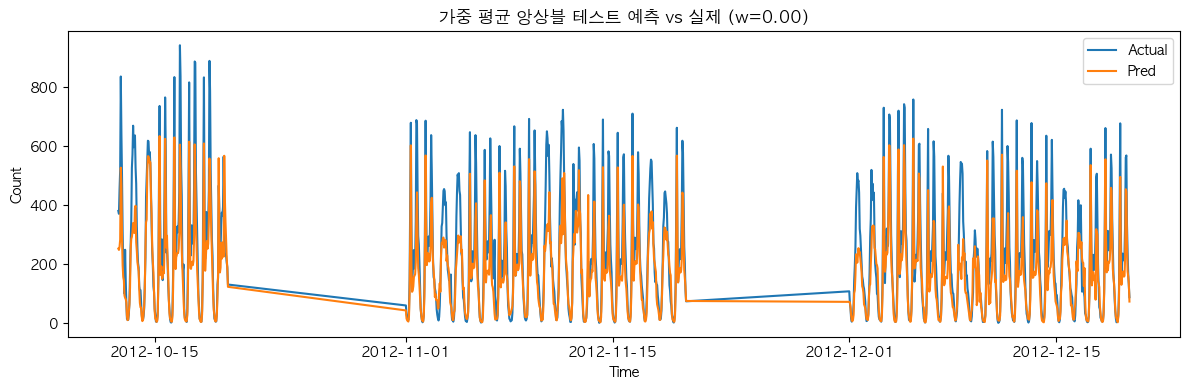

In [8]:
def weighted_ensemble(y1, y2, w):
    """
    Îëê Î™®Îç∏Ïùò ÏòàÏ∏°Í∞íÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†ÌïòÏó¨ ÏïôÏÉÅÎ∏î
    
    Parameters
    ----------
    y1 : array-like
        Ï≤´ Î≤àÏß∏ Î™®Îç∏Ïùò ÏòàÏ∏°Í∞í (Ïòà: ÏÑ†ÌòïÌöåÍ∑Ä)
    y2 : array-like
        Îëê Î≤àÏß∏ Î™®Îç∏Ïùò ÏòàÏ∏°Í∞í (Ïòà: ÎûúÎç§Ìè¨Î†àÏä§Ìä∏)
    w : float
        Ï≤´ Î≤àÏß∏ Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò (0~1 ÏÇ¨Ïù¥ Í∞í)
        Îëê Î≤àÏß∏ Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπòÎäî ÏûêÎèôÏúºÎ°ú (1 - w)
    
    Returns
    -------
    array-like
        Í∞ÄÏ§ë ÌèâÍ∑†Îêú ÏòàÏ∏°Í∞í
    """
    return w*y1 + (1-w)*y2


def search_weight_and_report(lin_val_pred, rf_val_pred, y_val,
                             lin_test_pred, rf_test_pred, y_test,
                             weights=np.linspace(0, 1, 21),
                             title_prefix='ÏïôÏÉÅÎ∏î'):
    """
    Îã§ÏñëÌïú Í∞ÄÏ§ëÏπò Ï°∞Ìï©ÏúºÎ°ú Í≤ÄÏ¶ù ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥†,
    ÏµúÏ†Å Í∞ÄÏ§ëÏπòÎ•º Ï∞æÏïÑ ÌÖåÏä§Ìä∏ÏÖã ÏÑ±Îä•ÍπåÏßÄ Î≥¥Í≥†ÌïòÎäî Ìï®Ïàò.
    
    Parameters
    ----------
    lin_val_pred, rf_val_pred : array-like
        Í≤ÄÏ¶ùÏÖãÏóêÏÑú ÏÑ†ÌòïÌöåÍ∑Ä/ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÏòàÏ∏°Í∞í
    y_val : Series or array-like
        Í≤ÄÏ¶ùÏÖã Ïã§Ï†úÍ∞í
    lin_test_pred, rf_test_pred : array-like
        ÌÖåÏä§Ìä∏ÏÖãÏóêÏÑú ÏÑ†ÌòïÌöåÍ∑Ä/ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÏòàÏ∏°Í∞í
    y_test : Series or array-like
        ÌÖåÏä§Ìä∏ÏÖã Ïã§Ï†úÍ∞í
    weights : array-like
        ÌÉêÏÉâÌï† Í∞ÄÏ§ëÏπò ÌõÑÎ≥¥ Î¶¨Ïä§Ìä∏ (0~1)
    title_prefix : str
        ÏãúÍ∞ÅÌôî Î∞è Ï∂úÎ†• Ï†úÎ™© prefix
    """
    rows = []
    best_w, best_rmse = None, float('inf')

    # -----------------------------
    # 1) Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏ§ëÏπòÎ≥Ñ ÏÑ±Îä• Ï∏°Ï†ï
    # -----------------------------
    for w in weights:
        # ÌòÑÏû¨ Í∞ÄÏ§ëÏπò Ï°∞Ìï©ÏúºÎ°ú ÏïôÏÉÅÎ∏î ÏòàÏ∏°
        ens_val = weighted_ensemble(lin_val_pred, rf_val_pred, w)
        
        # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
        mae, mse, rmse, r2 = compute_metrics(y_val.to_numpy(), ens_val)
        
        # Í∏∞Î°ù Ï†ÄÏû•
        rows.append({
            'weight_linear': float(w),
            'weight_rf': float(1-w),
            'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2
        })
        
        # ÏµúÏ†Å Í∞ÄÏ§ëÏπò Í∞±Ïã† (RMSE ÏµúÏÜå Í∏∞Ï§Ä)
        if rmse < best_rmse:
            best_rmse = rmse
            best_w = w

    # -----------------------------
    # 2) DataFrame Ï†ïÎ¶¨
    # -----------------------------
    df = pd.DataFrame(rows)
    df_sorted = df.sort_values('weight_linear').reset_index(drop=True)

    # -----------------------------
    # 3) Í∞ÄÏ§ëÏπò vs RMSE Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
    # -----------------------------
    plt.figure(figsize=(8,4.5))
    plt.plot(df_sorted['weight_linear'], df_sorted['RMSE'], marker='o')
    
    # ÏµúÏ†Å ÏßÄÏ†ê ÌëúÏãú
    plt.scatter([best_w], [best_rmse], s=80, color="red")
    plt.title(f'{title_prefix} (Í≤ÄÏ¶ù) ‚Äî Í∞ÄÏ§ëÏπòÏóê Îî∞Î•∏ RMSE')
    plt.xlabel('ÏÑ†ÌòïÌöåÍ∑Ä Í∞ÄÏ§ëÏπò w  (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Í∞ÄÏ§ëÏπò = 1 - w)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

    # -----------------------------
    # 4) Í≤ÄÏ¶ù Í≤∞Í≥º ÏÉÅÏúÑ 5Í∞ú (RMSE Í∏∞Ï§Ä)
    # -----------------------------
    topk = df.nsmallest(5, 'RMSE').copy()
    topk['linear%'] = (topk['weight_linear']*100).round(0).astype(int)
    topk['rf%'] = (topk['weight_rf']*100).round(0).astype(int)
    
    print('\n[Í≤ÄÏ¶ù Í≤∞Í≥º ÏÉÅÏúÑ 5Í∞ú (RMSE Í∏∞Ï§Ä)]')
    print(
        topk[['weight_linear', 'weight_rf', 'linear%', 'rf%', 'MAE', 'RMSE', 'R2']]
        .rename(columns={'weight_linear':'w(linear)','weight_rf':'w(rf)'})
        .to_string(index=False, float_format=lambda x: f'{x:,.3f}')
    )

    # -----------------------------
    # 5) ÏµúÏ†Å Í∞ÄÏ§ëÏπòÎ°ú ÌÖåÏä§Ìä∏ÏÖã ÏÑ±Îä• ÌèâÍ∞Ä
    # -----------------------------
    ens_test = weighted_ensemble(lin_test_pred, rf_test_pred, best_w)
    mae_t, mse_t, rmse_t, r2_t = compute_metrics(y_test.to_numpy(), ens_test)

    print('\n[ÏöîÏïΩ]')
    print(f"- ÏµúÏ†Å Í∞ÄÏ§ëÏπò w = {best_w:.2f}  "
          f"(ÏÑ†ÌòïÌöåÍ∑Ä {best_w*100:.0f}%, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ {(1-best_w)*100:.0f}%)")
    print(f"- Í≤ÄÏ¶ù RMSE = {best_rmse:.3f}")
    print(f"- ÌÖåÏä§Ìä∏ ÏÑ±Îä• ‚Üí MAE={mae_t:.3f}, RMSE={rmse_t:.3f}, R^2={r2_t:.3f}")

    # -----------------------------
    # 6) ÌÖåÏä§Ìä∏ÏÖã Ïã§Ï†úÍ∞í vs ÏïôÏÉÅÎ∏î ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî
    # -----------------------------
    try:
        plot_actual_vs_pred(
            test_df['datetime'].values,   # Í∏∞Ï°¥ ÏΩîÎìúÏùò test_df ÌôúÏö©
            y_test.to_numpy(),
            ens_test,
            f'{title_prefix} ÌÖåÏä§Ìä∏ ÏòàÏ∏° vs Ïã§Ï†ú (w={best_w:.2f})'
        )
    except NameError:
        # test_dfÍ∞Ä Ïô∏Î∂ÄÏóêÏÑú Ï†ïÏùòÎêòÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞ ÎåÄÎπÑ
        pass

    return best_w, df_sorted


# ---------------------------
# ÏÇ¨Ïö© ÏòàÏãú
# ---------------------------
best_w, df_weights = search_weight_and_report(
    lin_val_pred, rf_val_pred, y_val,
    lin_test_pred, rf_test_pred, y_test,
    weights=np.linspace(0, 1, 21),  # 0.00 ~ 1.00 (0.05 Í∞ÑÍ≤©)
    title_prefix='Í∞ÄÏ§ë ÌèâÍ∑† ÏïôÏÉÅÎ∏î'
)




### 2-4. ÏûîÏ∞® Î∂ÑÏÑù
- ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ ÏûîÏ∞® ÏãúÍ∞ÅÌôî Î∞è Î∂ÑÌè¨ ÌôïÏù∏
- Ìå®ÌÑ¥/Ïù¥Î∂ÑÏÇ∞/ÎπÑÏ†ïÏÉÅÏÑ± Ïó¨Î∂Ä Ï†êÍ≤Ä


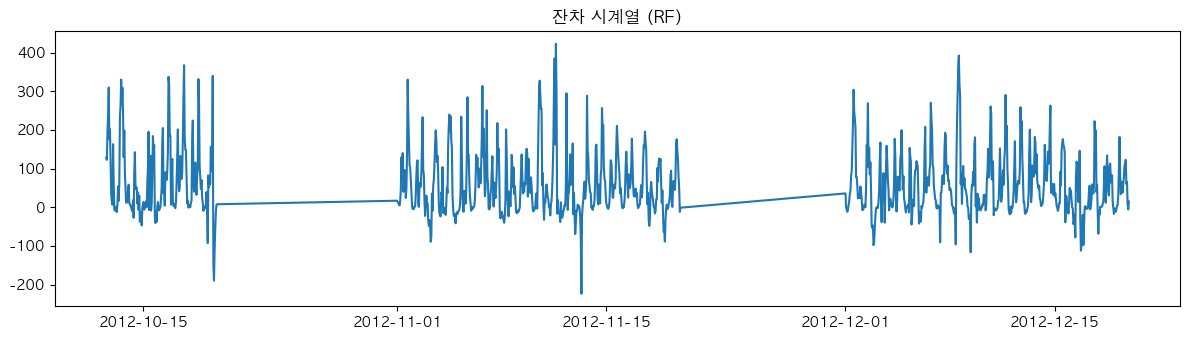

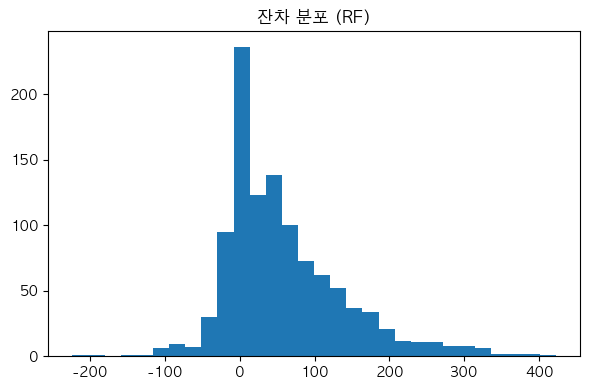

In [9]:
# -----------------------------
# 1) ÏûîÏ∞® Í≥ÑÏÇ∞
# -----------------------------
# Ïã§Ï†úÍ∞í - ÏòàÏ∏°Í∞í = ÏûîÏ∞®(residual)
residual = y_test.to_numpy() - rf_test_pred


# -----------------------------
# 2) ÏûîÏ∞® ÏãúÍ≥ÑÏó¥ ÌîåÎ°Ø
# -----------------------------
plt.figure(figsize=(12,3.5))
plt.plot(test_df['datetime'].values, residual)   # xÏ∂ï: ÏãúÍ∞Ñ(datetime), yÏ∂ï: ÏûîÏ∞®
plt.title('ÏûîÏ∞® ÏãúÍ≥ÑÏó¥ (RF)')                   # Ï†úÎ™©
plt.tight_layout()
plt.show()

# Ìï¥ÏÑù: ÏãúÍ∞ÑÏóê Îî∞Îùº ÏûîÏ∞®Í∞Ä ÏùºÏ†ï Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏
#       (ÎûúÎç§Ìïú Î∂ÑÌè¨ÎùºÎ©¥ Î™®Îç∏Ïù¥ ÏãúÍ≥ÑÏó¥ Íµ¨Ï°∞Î•º Ïûò ÏÑ§Î™ÖÌïòÍ≥† ÏûàÎã§Îäî ÏùòÎØ∏)


# -----------------------------
# 3) ÏûîÏ∞® Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
# -----------------------------
plt.figure(figsize=(6,4))
plt.hist(residual, bins=30)                     # Íµ¨Í∞ÑÏùÑ 30Í∞úÎ°ú ÎÇòÎà† Î∂ÑÌè¨ ÌôïÏù∏
plt.title('ÏûîÏ∞® Î∂ÑÌè¨ (RF)')
plt.tight_layout()
plt.show()

# Ìï¥ÏÑù: ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ Ï¢Ö Î™®Ïñë(Bell-shape)Ïù¥Î©¥ Î™®Îç∏ Ï†ÅÌï©Ïù¥ ÏñëÌò∏Ìï®
#       ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥ê ÏûàÍ±∞ÎÇò Í∏¥ Íº¨Î¶¨Í∞Ä ÏûàÏúºÎ©¥ Ìé∏Ìñ•(bias) ÎòêÎäî Í≥ºÎåÄ/Í≥ºÏÜå ÏòàÏ∏° Í∞ÄÎä•ÏÑ± ÏûàÏùå



### 2-5. ÏûîÏ∞® Î∂ÑÏÑù Í≤∞Í≥º Ìï¥ÏÑù (Random Forest)

#### 1). ÏûîÏ∞® ÏãúÍ≥ÑÏó¥ (Residual Time Series)
- ÏãúÍ∞Ñ Ï∂ïÏóê Îî∞Îùº ÏòàÏ∏° Ïò§Ï∞®(Ïã§Ï†úÍ∞í - ÏòàÏ∏°Í∞í)Î•º ÌëúÏãúÌïú Í∑∏ÎûòÌîÑ  
- **ÌäπÏßï**:
  - ÎåÄÎ∂ÄÎ∂Ñ ÏûîÏ∞®Í∞Ä 0 Í∑ºÏ≤òÏóê Î∂ÑÌè¨ÌïòÏßÄÎßå, Íµ¨Í∞ÑÎ≥ÑÎ°ú Î≠âÏπ® ÌòÑÏÉÅÏù¥ Î≥¥ÏûÑ
  - ÏùºÎ∂Ä ÏãúÏ†êÏóêÏÑú ÌÅ∞ ÏñëÏàò(Í≥ºÏÜåÏòàÏ∏°) ÎòêÎäî ÏùåÏàò(Í≥ºÎåÄÏòàÏ∏°) ÌîºÌÅ¨ Î∞úÏÉù
  - ÏôÑÏ†ÑÌûà Î¨¥ÏûëÏúÑ(white noise) ÌòïÌÉúÍ∞Ä ÏïÑÎãàÎ©∞, ÏãúÍ∞ÑÏóê Îî∞Î•∏ Íµ¨Ï°∞Ï†Å Ìå®ÌÑ¥Ïù¥ ÎÇ®ÏïÑ ÏûàÏùå  

 **Ìï¥ÏÑù**:  
Î™®Îç∏Ïù¥ ÌèâÍ∑†Ï†ÅÏúºÎ°úÎäî Ïûò ÎßûÏ∂îÏßÄÎßå, **ÌäπÏ†ï ÏãúÏ†ê(Í∏âÎì±/Í∏âÎùΩ Íµ¨Í∞Ñ Îì±)**ÏóêÏÑúÎäî ÏòàÏ∏°Î†•Ïù¥ Îñ®Ïñ¥ÏßÄÎ©∞,  
Ïù¥Îäî Î™®Îç∏Ïù¥ **Í≥ÑÏ†àÏÑ±/Ï∂îÏÑ∏ Í∞ôÏùÄ ÏùºÎ∂Ä Ìå®ÌÑ¥ÏùÑ Ï∂©Î∂ÑÌûà Î∞òÏòÅÌïòÏßÄ Î™ªÌñàÏùåÏùÑ ÏãúÏÇ¨**Ìï®.

---

#### 2) ÏûîÏ∞® Î∂ÑÌè¨ (Residual Histogram)
- ÏûîÏ∞® Í∞íÏùò ÎπàÎèÑ Î∂ÑÌè¨Î•º ÎÇòÌÉÄÎÇ∏ Í∑∏ÎûòÌîÑ  
- **ÌäπÏßï**:
  - Ï§ëÏã¨Ïù¥ 0 Í∑ºÏ≤òÏóê ÏûàÏúºÎ©∞, ÎåÄÏ≤¥Î°ú Ï¢åÏö∞ ÎåÄÏπ≠Ïóê Í∞ÄÍπåÏö¥ ÌòïÌÉú
  - Îã§Îßå Ïò§Î•∏Ï™Ω Íº¨Î¶¨(ÏñëÏùò ÏûîÏ∞®)Í∞Ä Ï°∞Í∏à Îçî Í∏∏Ïñ¥ Ïã§Ï†úÎ≥¥Îã§ ÏûëÍ≤å ÏòàÏ∏°ÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏùºÎ∂Ä Ï°¥Ïû¨
  - ÎåÄÎ∂ÄÎ∂Ñ ÏûîÏ∞®Îäî -100 ~ +200 Íµ¨Í∞ÑÏóê Î∂ÑÌè¨, ÏÜåÏàòÏùò Í∑πÎã®Í∞í(¬±200~400) Ï°¥Ïû¨  

 **Ìï¥ÏÑù**:  
ÏûîÏ∞® Î∂ÑÌè¨Îäî ÎåÄÏ≤¥Î°ú Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπåÏõå **ÌÅ∞ Ìé∏Ìñ•ÏùÄ ÏóÜÏßÄÎßå**,  
ÏïΩÍ∞ÑÏùò Ïò§Î•∏Ï™Ω ÎπÑÎåÄÏπ≠ÏÑ±ÏúºÎ°ú Ïù∏Ìï¥ **Í≥ºÏÜåÏòàÏ∏° Í≤ΩÌñ•**Ïù¥ ÌôïÏù∏Îê®.  
ÎòêÌïú ÏùºÎ∂Ä **Ïù¥ÏÉÅÏπò(Outlier)** Ïò§Ï∞®Í∞Ä Ï°¥Ïû¨ÌïòÏó¨ Í∞úÏÑ† Ïó¨ÏßÄÍ∞Ä ÏûàÏùå.

---

#### Ï¢ÖÌï© Í≤∞Î°†
- RF(RandomForest) Î™®Îç∏ÏùÄ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏÑ±Îä•Ïù¥ ÏñëÌò∏ÌïòÎÇò,  
  1. ÏûîÏ∞® ÏãúÍ≥ÑÏó¥ÏóêÏÑú **ÏãúÍ∞Ñ Íµ¨Ï°∞Ï†Å Ìå®ÌÑ¥**Ïù¥ ÎÇ®ÏïÑ ÏûàÏùå  
  2. ÏûîÏ∞® Î∂ÑÌè¨ÏóêÏÑú **Í≥ºÏÜåÏòàÏ∏° Í≤ΩÌñ• Î∞è Ïù¥ÏÉÅÏπò**Í∞Ä ÌôïÏù∏Îê®  

 **Í∞úÏÑ† Î∞©Ìñ•**:
- ÏãúÍ≥ÑÏó¥ ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌïú ÌîºÏ≤ò Ï∂îÍ∞Ä (ÏöîÏùº, Ï£ºÍ∏∞ÏÑ±, Lag, Rolling Mean Îì±)
- Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶ò(XGBoost, LightGBM, LSTM Îì±) ÎπÑÍµê Ï†ÅÏö©
- ÏûîÏ∞® Í∏∞Î∞ò Ï∂îÍ∞Ä ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏßÑÌñâ


### 3-1. ÏãúÍ≥ÑÏó¥ Ï†ÑÏö© Î™®Îç∏: SARIMA, Prophet(ÏÑ†ÌÉù)
- Ïùº Îã®ÏúÑ ÌèâÍ∑†ÏúºÎ°ú ÏßëÍ≥Ñ ÌõÑ ÏòàÏ∏°
- SARIMA Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏãúÏó∞, ProphetÏùÄ ÏÑ§Ïπò Ïãú Ïã§Ìñâ


[Metrics]
MAE  : 36.915106 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 2645.839036 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 51.437720 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : -0.276301 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
SARIMA/VAL (36.915105848758586, 2645.8390363580256, 51.43771997627836, -0.2763014988133232)
[Metrics]
MAE  : 49.686400 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 3041.212785 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 55.147192 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : -1.677988 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
SARIMA/TEST (49.686400457179325, 3041.212784723112, 55.147191993093465, -1.677987591640588)


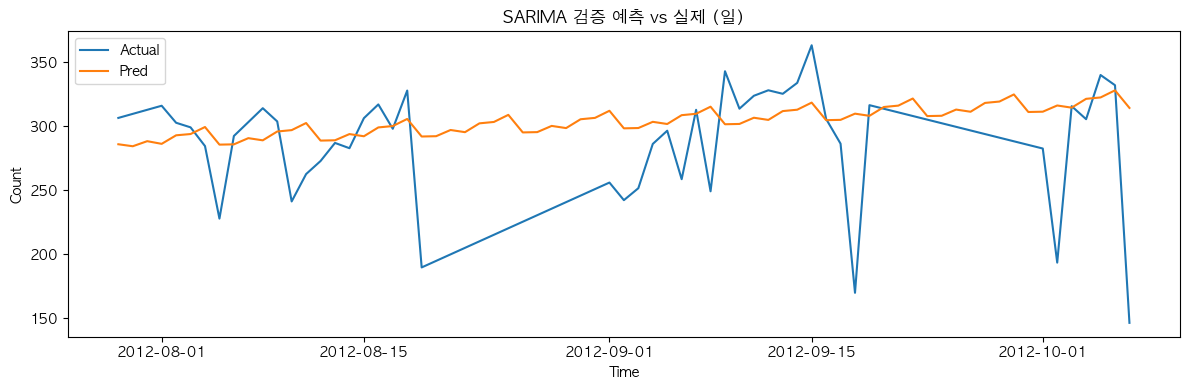

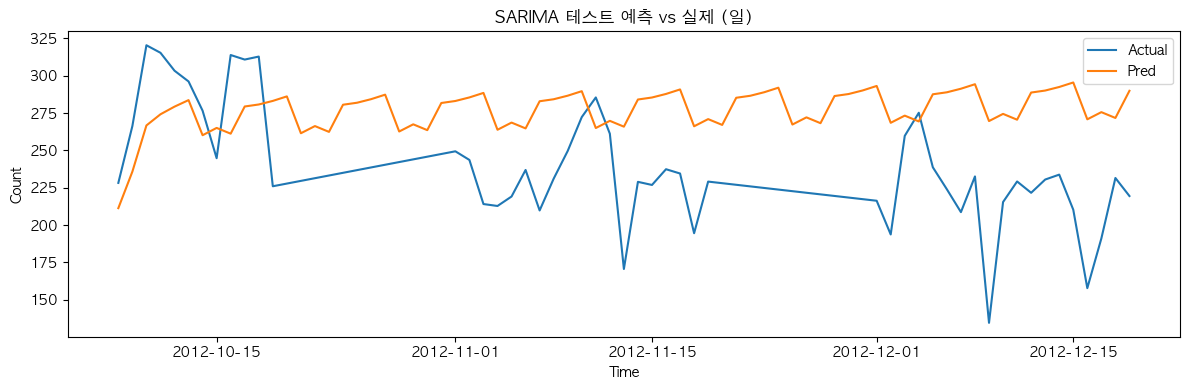

15:10:42 - cmdstanpy - INFO - Chain [1] start processing
15:10:42 - cmdstanpy - INFO - Chain [1] done processing


[Metrics]
MAE  : 55.136594 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 5054.311634 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 71.093682 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : -1.438102 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
Prophet/VAL (55.136593561391784, 5054.311634076586, 71.09368209676994, -1.4381020256323187)


In [10]:
def aggregate_daily(df: pd.DataFrame) -> pd.Series:
    """
    ÏãúÍ∞Ñ Îã®ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïùº Îã®ÏúÑÎ°ú ÏßëÍ≥ÑÌïòÎäî Ìï®Ïàò
    - datetimeÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ï
    - count Ïª¨ÎüºÏùÑ ÏùºÎ≥Ñ ÌèâÍ∑†ÏúºÎ°ú ÏßëÍ≥Ñ
    """
    return df.set_index('datetime')['count'].resample('D').mean()


# -----------------------------
# 1) Ïùº Îã®ÏúÑ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# -----------------------------
daily = aggregate_daily(df)

# Îπà ÎÇ†Ïßú Ï±ÑÏö∞Í∏∞ + Î≥¥Í∞Ñ Ï≤òÎ¶¨
daily = (
    daily.asfreq('D')        # Î™®Îì† ÎÇ†ÏßúÎ•º Ïó∞ÏÜçÏ†ÅÏúºÎ°ú Ï±ÑÏõÄ (Í≤∞Ï∏°Ïπò Î∞úÏÉù)
         .interpolate()      # ÏÑ†Ìòï Î≥¥Í∞Ñ (Ïó∞ÏÜçÎêú Í∞í Î≥¥Ï†ï)
         .ffill().bfill()    # Ïïû/Îí§ Í∞í Î≥¥Í∞ÑÏúºÎ°ú ÏûîÏó¨ Í≤∞Ï∏°Ïπò Î≥¥Ï†ï
)

# train/val/test Î∂ÑÌï† (80% / 10% / 10%)
N = len(daily)
N_tr, N_va = int(N*0.8), int(N*0.1)
daily_tr = daily.iloc[:N_tr]
daily_va = daily.iloc[N_tr:N_tr+N_va]
daily_te = daily.iloc[N_tr+N_va:]


# -----------------------------
# 2) SARIMA Î™®Îç∏ ÌïôÏäµ & ÏòàÏ∏°
# -----------------------------
# (1,1,1) ARIMA + (1,1,1,7) Ï£ºÍ∞Ñ Í≥ÑÏ†àÏÑ± Í≥†Î†§
sar = SARIMAX(
    daily_tr,
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# Í≤ÄÏ¶ù Íµ¨Í∞Ñ ÏòàÏ∏°
va_fc = sar.forecast(steps=len(daily_va)).to_numpy()

# ÌïôÏäµ+Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Î•º ÌôúÏö©ÌïòÏó¨ test Íµ¨Í∞Ñ ÏòàÏ∏°
combined = pd.concat([daily_tr, daily_va])
te_fc = (
    SARIMAX(
        combined,
        order=(1,1,1),
        seasonal_order=(1,1,1,7),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    .fit(disp=False)
    .forecast(steps=len(daily_te))
    .to_numpy()
)

# ÏÑ±Îä• ÌèâÍ∞Ä Ï∂úÎ†•
print('SARIMA/VAL', compute_metrics(daily_va.to_numpy(), va_fc))
print('SARIMA/TEST', compute_metrics(daily_te.to_numpy(), te_fc))

# Ïã§Ï†ú vs ÏòàÏ∏° ÏãúÍ∞ÅÌôî
plot_actual_vs_pred(daily_va.index, daily_va.to_numpy(), va_fc, 'SARIMA Í≤ÄÏ¶ù ÏòàÏ∏° vs Ïã§Ï†ú (Ïùº)')
plot_actual_vs_pred(daily_te.index, daily_te.to_numpy(), te_fc, 'SARIMA ÌÖåÏä§Ìä∏ ÏòàÏ∏° vs Ïã§Ï†ú (Ïùº)')


# -----------------------------
# 3) Prophet Î™®Îç∏ ÌïôÏäµ & ÏòàÏ∏° (ÏÑ§Ïπò Ïó¨Î∂Ä ÌôïÏù∏)
# -----------------------------
if _HAS_PROPHET:
    # ProphetÏùÄ ds, y Ïª¨Îüº ÌïÑÏöî
    dprop = pd.DataFrame({'ds': daily_tr.index, 'y': daily_tr.values})
    
    # Prophet Î™®Îç∏ ÏÉùÏÑ± (Ï£ºÍ∞Ñ seasonalityÎßå ÏÇ¨Ïö©)
    m = Prophet(
        seasonality_mode='additive',
        weekly_seasonality=True,
        daily_seasonality=False,
        yearly_seasonality=False
    )
    m.fit(dprop)
    
    # Í≤ÄÏ¶ù Íµ¨Í∞Ñ Í∏∏Ïù¥ÎßåÌÅº ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    future = pd.DataFrame({
        'ds': pd.date_range(
            start=daily_tr.index[-1] + pd.Timedelta(days=1),
            periods=len(daily_va),
            freq='D'
        )
    })
    
    # ÏòàÏ∏° ÏàòÌñâ
    yhat_val = m.predict(future)['yhat'].to_numpy()
    
    # ÏÑ±Îä• ÌèâÍ∞Ä
    print('Prophet/VAL', compute_metrics(daily_va.to_numpy(), yhat_val))

else:
    print('Prophet ÎØ∏ÏÑ§Ïπò: Í±¥ÎÑàÎúÄ')



### 3-2. Ïôú SARIMAÏôÄ ProphetÏùÄ ÏÑ±Îä•Ïù¥ ÎÇÆÏùÑÍπå?

#### 1) Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±Í≥ºÏùò Î∂ÄÏ†ÅÌï©ÏÑ±
- SARIMA/ProphetÏùÄ **Ï∂îÏÑ∏ + Í≥ÑÏ†àÏÑ±** Ìå®ÌÑ¥Ïù¥ ÎöúÎ†∑ÌïòÍ≥† ÎπÑÍµêÏ†Å ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïóê Í∞ïÏ†êÏù¥ ÏûàÏùå.  
- ÌïòÏßÄÎßå ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ Îç∞Ïù¥ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÌäπÏÑ±Ïù¥ Ï°¥Ïû¨:
  - **Ïô∏Î∂Ä ÏöîÏù∏**(Í∏∞Ïò®, ÏäµÎèÑ, ÎÇ†Ïî®, ÏöîÏùº, Í∑ºÎ¨¥Ïùº Ïó¨Î∂Ä, ÏãúÍ∞ÑÎåÄ Îì±)Ïóê ÌÅ¨Í≤å ÏùòÏ°¥  
  - ÎÇ†Ïî® Î≥ÄÌôîÎÇò Ìú¥Ïùº Ïù¥Î≤§Ìä∏ Îì±ÏúºÎ°ú **Í∏âÍ≤©Ìïú ÏàòÏöî Î≥ÄÎèô(Ïä§ÌååÏù¥ÌÅ¨)** Î∞úÏÉù  
- Îî∞ÎùºÏÑú Îã®ÏàúÌûà Í≥ºÍ±∞ ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥Îßå Î≥¥Îäî SARIMA/ProphetÏùÄ Ïù¥Î•º Ï†úÎåÄÎ°ú Î∞òÏòÅÌïòÏßÄ Î™ªÌï®.  

---

#### 2) Î™®Îç∏Ïùò Íµ¨Ï°∞Ï†Å ÌïúÍ≥Ñ
##### SARIMA
- ÏûêÍ∏∞ÌöåÍ∑Ä(AR) + Ï∞®Î∂Ñ(I) + Ïù¥ÎèôÌèâÍ∑†(MA) + Í≥ÑÏ†àÏÑ±(S)ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏûëÎèô.  
- **Îã®Ïùº/Í≥†Ï†ïÎêú Í≥ÑÏ†àÏÑ±**ÏóêÎäî Ïûò ÎßûÏßÄÎßå, ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ Îç∞Ïù¥ÌÑ∞Ï≤òÎüº **ÌïòÎ£® Ï£ºÍ∏∞ + Ï£ºÍ∞Ñ Ï£ºÍ∏∞ + ÎÇ†Ïî® ÏòÅÌñ•**Ïù¥ ÎèôÏãúÏóê Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ ÌïúÍ≥ÑÍ∞Ä ÏûàÏùå.  
- ÌäπÌûà ÏãúÍ∞ÑÎåÄÎ≥Ñ Î≥ÄÎèôÏÑ±Ïù¥ ÌÅ∞ Ìå®ÌÑ¥ÏùÑ Ìè¨Ï∞©ÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ.  

##### Prophet
- Íµ¨Ï°∞: **Ìä∏Î†åÎìú + Ï£ºÍ∞Ñ/Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ± + Ìú¥Ïùº Ìö®Í≥º**  
- Ïû•Ï†ê: Ìú¥Ïùº Ìö®Í≥º Î∞òÏòÅ, ÎπÑÏÑ†Ìòï Ìä∏Î†åÎìú Ï≤òÎ¶¨  
- Îã®Ï†ê: **Îã®Í∏∞ Î≥ÄÎèôÏÑ±**Í≥º **ÎπÑÏÑ†Ìòï Ïô∏Î∂Ä Î≥ÄÏàò Ìö®Í≥º**(Ïòà: ÌäπÏ†ï Í∏∞Ïò® Íµ¨Í∞ÑÏóêÏÑú ÏàòÏöî Í∏âÏ¶ù)Î•º Î∞òÏòÅÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ.  
- Ïù¥Î≤à Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï§ëÏöîÌïú Í∏∞ÏÉÅ¬∑ÏãúÍ∞Ñ ÏöîÏù∏ÏùÑ ÏßÅÏ†ë Î∞òÏòÅÌï† Ïàò ÏóÜÏóàÏùå.  

---

#### 3) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨/Î∂ÑÌï¥ ÌïúÍ≥Ñ
- Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏóêÎäî Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò, Í∑πÎã®Ï†Å Ïù¥Î≤§Ìä∏(Ìè≠Ïö∞, Ìè≠ÏÑ§ Îì±)Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå.  
- SARIMA/ProphetÏùÄ Ïù¥Îü∞ Ïù¥ÏÉÅ Î≥ÄÎèôÏùÑ **Ï∂îÏÑ∏/Í≥ÑÏ†àÏÑ±ÏúºÎ°ú ÏûòÎ™ª Ìù°Ïàò**ÌïòÏó¨ Ïò§Ï∞®Í∞Ä Ïª§Ïßê.  

---

#### 4) Îã§Î•∏ Î™®Îç∏Í≥ºÏùò ÎπÑÍµê
- **Linear Regression, RandomForest** Îì± Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏùÄ **Ïô∏Î∂Ä ÌîºÏ≤ò**Î•º ÏßÅÏ†ë ÌôúÏö© Í∞ÄÎä•:
  - Í∏∞Ïò®Ïù¥ ÎÜíÏùÑ Îïå ÏàòÏöî Ï¶ùÍ∞Ä  
  - Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ(17~19Ïãú) ÏàòÏöî Ìè≠Ï¶ù  
- Îî∞ÎùºÏÑú ÎπÑÏÑ†Ìòï¬∑Î≥µÌï©Ï†ÅÏù∏ ÏöîÏù∏ÏùÑ ÌïôÏäµÌïòÏó¨ ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÎê®.  
- Î∞òÎ©¥ SARIMA/ProphetÏùÄ **Ïô∏Î∂Ä ÏöîÏù∏ ÏóÜÏù¥ Ïò§ÏßÅ Í≥ºÍ±∞ ÏàòÏöî Îç∞Ïù¥ÌÑ∞Îßå** ÏÇ¨Ïö© ‚Üí ÏÑ±Îä•Ïù¥ ÎÇÆÍ≤å ÎÇòÌÉÄÎÇ®.  

---

#### Í≤∞Î°†
- SARIMA/ProphetÏùò ÎÇÆÏùÄ ÏÑ±Îä• Ïù¥Ïú†:
  1. **Ïô∏Î∂Ä ÏöîÏù∏(ÎÇ†Ïî®¬∑ÏöîÏùº¬∑ÏãúÍ∞ÑÎåÄ)ÏùÑ Î∞òÏòÅÌïòÏßÄ Î™ªÌï®**  
  2. **Í∏âÍ≤©Ìïú ÏàòÏöî Î≥ÄÎèô(Ïä§ÌååÏù¥ÌÅ¨)Ïóê Ï∑®ÏïΩ**  
  3. **Îã§Ï§ë Í≥ÑÏ†àÏÑ±Í≥º ÎπÑÏÑ†Ìòï Íµ¨Ï°∞Î•º Ï∂©Î∂ÑÌûà ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï®**  

Ïù¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî **ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Í∞ôÏùÄ ÌîºÏ≤ò Í∏∞Î∞ò Î®∏Ïã†Îü¨Îãù Î™®Îç∏**Ïù¥ Ìõ®Ïî¨ Îçî Ï†ÅÌï©ÌïòÎ©∞,  
Ï∂îÍ∞ÄÎ°ú Gradient Boosting Í≥ÑÏó¥(XGBoost, LightGBM)Ïù¥ÎÇò ÏãúÍ≥ÑÏó¥ ÌäπÌôî Îî•Îü¨Îãù(LSTM Îì±)ÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏùå.


### 4-1. ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± Î∞è LSTM Î™®Îç∏ Ï†ïÏùò
- ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞ 24(ÌïòÎ£®)Î°ú ÏãúÌÄÄÏä§ Íµ¨ÏÑ±, horizon=1
- Îã®Ïàú LSTM ÌöåÍ∑Ä Ìó§Îìú

In [11]:
import torch
from torch import nn
from torch.utils.data import DataLoader

def _set_seed(seed: int = 42) -> None:
    """
    ÎûúÎç§ ÏãúÎìúÎ•º Í≥†Ï†ïÌïòÏó¨ Ïû¨ÌòÑÏÑ±(reproducibility)ÏùÑ ÌôïÎ≥¥ÌïòÎäî Ìï®Ïàò
    
    Parameters
    ----------
    seed : int, default=42
        ÎÇúÏàò ÏãúÎìú Í∞í (Í≥†Ï†ïÌï† Ïà´Ïûê)
    
    ÏÑ§Î™Ö
    ----
    - np.random.seed(seed): NumPy ÎÇúÏàò ÏãúÎìú Í≥†Ï†ï
    - torch.manual_seed(seed): CPU Ïó∞ÏÇ∞Ïö© PyTorch ÎÇúÏàò ÏãúÎìú Í≥†Ï†ï
    - torch.cuda.manual_seed_all(seed): GPU Ïó∞ÏÇ∞Ïö© PyTorch ÎÇúÏàò ÏãúÎìú Í≥†Ï†ï
      (Î©ÄÌã∞ GPU ÌôòÍ≤ΩÏóêÏÑúÎèÑ ÎèôÏùºÌïú ÏãúÎìúÍ∞Ä Ï†ÅÏö©Îê®)
    """
    # NumPy ÎÇúÏàò ÏãúÎìú Í≥†Ï†ï
    np.random.seed(seed)
    
    # PyTorch CPU ÎÇúÏàò ÏãúÎìú Í≥†Ï†ï
    torch.manual_seed(seed)
    
    # PyTorch GPU ÎÇúÏàò ÏãúÎìú Í≥†Ï†ï (Î™®Îì† GPUÏóê Ï†ÅÏö©)
    torch.cuda.manual_seed_all(seed)


In [12]:
def build_feature_matrix(df: pd.DataFrame):
    """
    DataFrameÏóêÏÑú Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† ÌäπÏßï ÌñâÎ†¨(X)Í≥º ÌÉÄÍπÉ Î≤°ÌÑ∞(y)Î•º ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò
    
    Parameters
    ----------
    df : pd.DataFrame
        ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (datetime Ìè¨Ìï®, bike sharing demand Îç∞Ïù¥ÌÑ∞ÏÖã)
    
    Returns
    -------
    X : np.ndarray (shape = [n_samples, n_features])
        ÌäπÏßï ÌñâÎ†¨ (float32 ÌÉÄÏûÖ)
    y : np.ndarray (shape = [n_samples])
        ÌÉÄÍπÉ Î≤°ÌÑ∞ (count, float32 ÌÉÄÏûÖ)
    feature_cols : list of str
        ÏÇ¨Ïö©Îêú ÌäπÏßï Î≥ÄÏàòÎì§Ïùò Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
    """
    # ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò Ïª¨Îüº Ï†ïÏùò
    feature_cols = [
        'temp','atemp','humidity','windspeed',  # Í∏∞ÏÉÅ Í¥ÄÎ†®
        'season','holiday','workingday','weather',  # Ïπ¥ÌÖåÍ≥†Î¶¨/ÏÉÅÌô© Î≥ÄÏàò
        'year','month','dayofweek','hour'      # ÏãúÍ∞Ñ Í¥ÄÎ†® ÌååÏÉù Î≥ÄÏàò
    ]
    
    # X: ÌäπÏßï ÌñâÎ†¨ (NumPy Î∞∞Ïó¥, float32Î°ú Î≥ÄÌôò ‚Üí PyTorch/TF ÌïôÏäµ Ìò∏Ìôò)
    X = df[feature_cols].to_numpy(dtype=np.float32)
    
    # y: ÌÉÄÍπÉ Î≤°ÌÑ∞ (ÎåÄÏó¨ ÏàòÏöî count, float32Î°ú Î≥ÄÌôò)
    y = df['count'].astype(np.float32).to_numpy()
    
    return X, y, feature_cols



In [13]:
def make_windows(X: np.ndarray, y: np.ndarray, window: int, horizon: int = 1):
    """
    ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º (ÏûÖÎ†• ÏãúÌÄÄÏä§, ÏòàÏ∏° ÎåÄÏÉÅ ÏãúÌÄÄÏä§) ÏúàÎèÑÏö∞ ÌòïÌÉúÎ°ú Î≥ÄÌôò
    
    Parameters
    ----------
    X : np.ndarray, shape = [n_samples, n_features]
        ÏûÖÎ†• ÌäπÏßï Îç∞Ïù¥ÌÑ∞ (ÏãúÍ∞Ñ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Îêú ÏÉÅÌÉú)
    y : np.ndarray, shape = [n_samples]
        ÌÉÄÍπÉ Î≤°ÌÑ∞ (Ïòà: count)
    window : int
        ÏûÖÎ†• ÏãúÌÄÄÏä§Ïùò Í∏∏Ïù¥ (Í≥ºÍ±∞ Í¥ÄÏ∏°Ïπò Í∞úÏàò)
    horizon : int, default=1
        ÏòàÏ∏°Ìï† ÎØ∏Îûò ÏãúÏ†êÏùò Í∞úÏàò (1Ïù¥Î©¥ Îã§Ïùå ÏãúÏ†êÎßå ÏòàÏ∏°)
    
    Returns
    -------
    xs : np.ndarray, shape = [n_windows, window, n_features]
        Î™®Îç∏ ÏûÖÎ†• (Í≥ºÍ±∞ window Í∏∏Ïù¥ÎßåÌÅºÏùò ÏãúÌÄÄÏä§)
    ys : np.ndarray, shape = [n_windows, horizon]
        Î™®Îç∏ Ï∂úÎ†• (horizon Í∏∏Ïù¥ÎßåÌÅºÏùò ÎØ∏Îûò Í∞í)
    
    ÏòàÏãú
    ----
    X = [[x1], [x2], [x3], [x4], [x5]], y = [y1, y2, y3, y4, y5]
    window=2, horizon=1 ‚Üí 
        xs = [[[x1],[x2]], [[x2],[x3]], [[x3],[x4]]]
        ys = [[y3], [y4], [y5]]
    """
    xs, ys = [], []
    
    # i ÏúÑÏπòÎ∂ÄÌÑ∞ window Í∏∏Ïù¥ ÎßåÌÅº XÎ•º ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ≥†,
    # Í∑∏ Îã§Ïùå horizon Í∏∏Ïù¥ ÎßåÌÅº yÎ•º ÏòàÏ∏° ÎåÄÏÉÅÏúºÎ°ú ÏÑ§Ï†ï
    for i in range(len(X) - window - horizon + 1):
        xs.append(X[i:i+window])                    # ÏûÖÎ†• Íµ¨Í∞Ñ (window Í∏∏Ïù¥)
        ys.append(y[i+window:i+window+horizon])     # Ï∂úÎ†• Íµ¨Í∞Ñ (horizon Í∏∏Ïù¥)
    
    # Î¶¨Ïä§Ìä∏Î•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò (float32 ‚Üí PyTorch Ìò∏Ìôò)
    return np.asarray(xs, dtype=np.float32), np.asarray(ys, dtype=np.float32)


### 4-2. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏
- ÌëúÏ§ÄÌôî: train Í∏∞Ï§Ä ÌèâÍ∑†/ÌëúÏ§ÄÌé∏Ï∞®
- ÌïôÏäµ: Adam + MSE, Î≤†Ïä§Ìä∏ Î™®Îç∏ ÏÑ†ÌÉù
- ÏòàÏ∏° vs Ïã§Ï†ú ÏãúÍ∞ÅÌôî


In [14]:
# -----------------------------------------
# LSTM + Linear head Ï°∞Ìï©ÏùÑ ÏâΩÍ≤å ÏÉùÏÑ±ÌïòÎäî Ìó¨Ìçº
# -----------------------------------------
def make_lstm_pair(input_size: int, hidden_size: int = 64, num_layers: int = 2, dropout: float = 0.1, device=None):
    """
    LSTM + Linear Ï°∞Ìï© Î™®Îç∏ÏùÑ Í∞ÑÎã®Ìûà ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò
    
    Parameters
    ----------
    input_size : int
        ÏûÖÎ†• ÌäπÏßï(feature) Í∞úÏàò
    hidden_size : int, default=64
        LSTM ÏùÄÎãâ ÏÉÅÌÉú(hidden state) Ï∞®Ïõê ÌÅ¨Í∏∞
    num_layers : int, default=2
        LSTM Î†àÏù¥Ïñ¥(Ï∏µ) Í∞úÏàò (Ïä§ÌÉù Íµ¨Ï°∞)
    dropout : float, default=0.1
        LSTM Î†àÏù¥Ïñ¥ ÏÇ¨Ïù¥Ïóê Ï†ÅÏö©Ìï† ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú®
    device : torch.device or None
        Î™®Îç∏ÏùÑ Ïò¨Î¶¥ Ïû•Ïπò (NoneÏù¥Î©¥ GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïó¨Î∂ÄÏóê Îî∞Îùº ÏûêÎèô ÏÑ†ÌÉù)
    
    Returns
    -------
    lstm : nn.LSTM
        ÏãúÍ≥ÑÏó¥ ÌäπÏßï Ï∂îÏ∂úÏö© LSTM ÎÑ§Ìä∏ÏõåÌÅ¨
    head : nn.Linear
        ÎßàÏßÄÎßâ hidden stateÎ•º Î∞õÏïÑ ÏµúÏ¢Ö ÏòàÏ∏°ÏùÑ Ï∂úÎ†•ÌïòÎäî Linear Î†àÏù¥Ïñ¥
    device : torch.device
        Î™®Îç∏Ïù¥ Ïò¨ÎùºÍ∞Ñ Ïû•Ïπò Ï†ïÎ≥¥
    """
    # ÌïôÏäµ Ïû•Ïπò ÏÑ†ÌÉù (GPU ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎ©¥ cuda, ÏïÑÎãàÎ©¥ cpu)
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # LSTM Ï†ïÏùò
    lstm = nn.LSTM(
        input_size=input_size,   # ÏûÖÎ†• ÌäπÏßï Ï∞®Ïõê
        hidden_size=hidden_size, # ÏùÄÎãâ ÏÉÅÌÉú Ï∞®Ïõê
        num_layers=num_layers,   # LSTM Ï∏µ Í∞úÏàò
        batch_first=True,        # ÏûÖÎ†• shape = (batch, seq_len, input_size)
        dropout=dropout          # Î†àÏù¥Ïñ¥ ÏÇ¨Ïù¥ dropout Ï†ÅÏö©
    ).to(device)
    
    # LSTMÏùò ÎßàÏßÄÎßâ hidden state ‚Üí ÏµúÏ¢Ö 1Ï∞®Ïõê Ï∂úÎ†•Í∞íÏúºÎ°ú Îß§Ìïë
    head = nn.Linear(hidden_size, 1).to(device)
    
    return lstm, head, device


# -----------------------------------------
# LSTM forward Ìï®Ïàò
# -----------------------------------------
def lstm_forward(lstm: nn.LSTM, head: nn.Linear, x: torch.Tensor) -> torch.Tensor:
    """
    LSTM + Linear head Ï°∞Ìï©Ïùò forward Ìå®Ïä§
    
    Parameters
    ----------
    lstm : nn.LSTM
        LSTM ÎÑ§Ìä∏ÏõåÌÅ¨
    head : nn.Linear
        ÏµúÏ¢Ö Ï∂úÎ†• Î†àÏù¥Ïñ¥
    x : torch.Tensor, shape = (batch, seq_len, input_size)
        ÏûÖÎ†• ÏãúÌÄÄÏä§
    
    Returns
    -------
    torch.Tensor, shape = (batch,)
        ÏòàÏ∏°Îêú Ï∂úÎ†•Í∞í (ÎßàÏßÄÎßâ ÏãúÏ†ê Í∏∞Ï§Ä)
    """
    # LSTM ÌÜµÍ≥º ‚Üí out: (batch, seq_len, hidden_size)
    out, _ = lstm(x)
    
    # ÎßàÏßÄÎßâ ÏãúÏ†êÏùò hidden state ÏÑ†ÌÉù (seq_lenÏùò ÎßàÏßÄÎßâ ÏúÑÏπò)
    last = out[:, -1, :]   # shape = (batch, hidden_size)
    
    # Linear head ÌÜµÍ≥º ‚Üí ÏµúÏ¢Ö Ï∂úÎ†•
    return head(last).squeeze(-1)   # shape = (batch,)


Epoch 001 - train MSE: 7.5473, val MSE: 0.9787
Epoch 002 - train MSE: 0.9544, val MSE: 0.3306
Epoch 003 - train MSE: 0.8853, val MSE: 0.2331
Epoch 004 - train MSE: 0.5703, val MSE: 0.2056
Epoch 005 - train MSE: 0.4702, val MSE: 0.2018
Epoch 006 - train MSE: 0.3617, val MSE: 0.1855
Epoch 007 - train MSE: 0.3484, val MSE: 0.1793
Epoch 008 - train MSE: 0.3090, val MSE: 0.1827
Epoch 009 - train MSE: 0.3078, val MSE: 0.1817
Epoch 010 - train MSE: 0.2866, val MSE: 0.1805
Epoch 011 - train MSE: 0.2523, val MSE: 0.1599
Epoch 012 - train MSE: 0.2387, val MSE: 0.1434
Epoch 013 - train MSE: 0.2169, val MSE: 0.1294
Epoch 014 - train MSE: 0.2033, val MSE: 0.1191
Epoch 015 - train MSE: 0.1897, val MSE: 0.1123
Epoch 016 - train MSE: 0.1816, val MSE: 0.1157
Epoch 017 - train MSE: 0.1843, val MSE: 0.1237
Epoch 018 - train MSE: 0.1663, val MSE: 0.1136
Epoch 019 - train MSE: 0.1604, val MSE: 0.1085
Epoch 020 - train MSE: 0.1585, val MSE: 0.1081


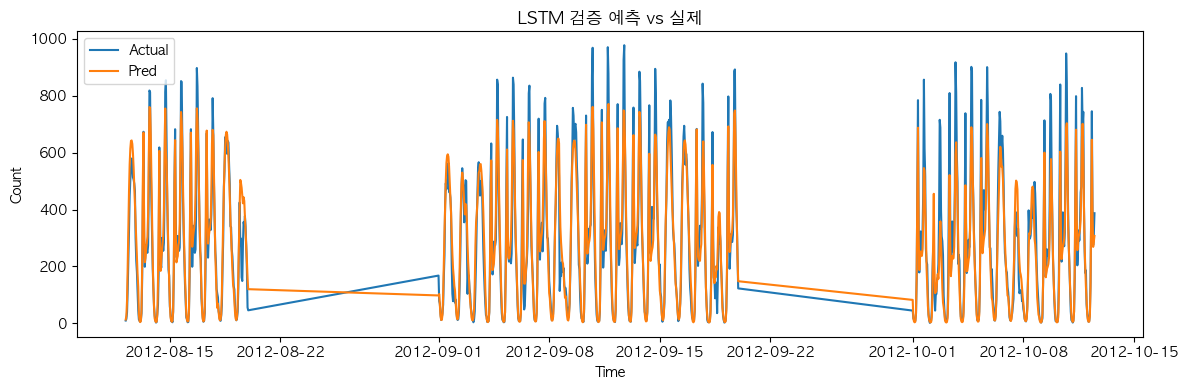

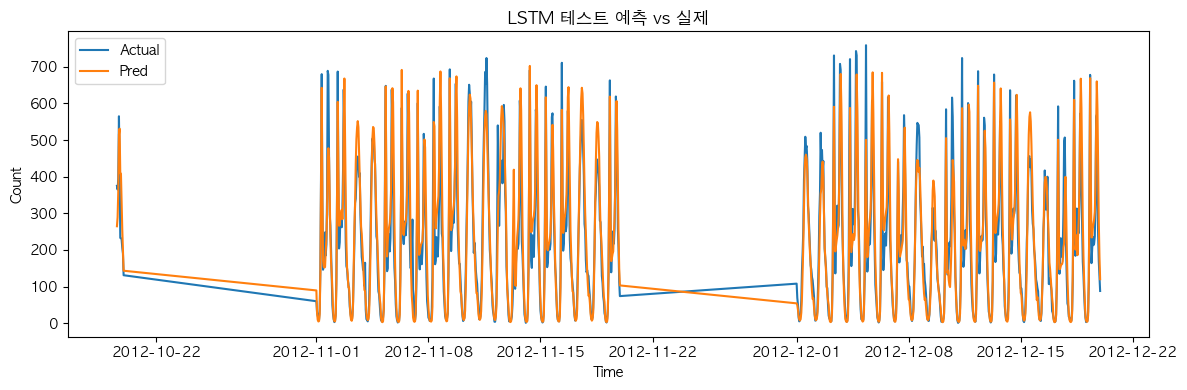

In [15]:
# -----------------------------
# ÌïôÏäµ Î£®ÌîÑ (ÌÅ¥ÎûòÏä§ Î≤ÑÏ†ÑÏù¥ ÏïÑÎãå Ìï®Ïàò Î≤ÑÏ†Ñ)
# -----------------------------
def train_model(model, train_loader, val_loader, epochs: int, lr: float, device):
    """
    ÏùºÎ∞ò nn.Module Í∏∞Î∞ò Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò
    - MSELoss, Adam, ReduceLROnPlateau, EarlyStopping Ìè¨Ìï®
    """
    criterion = nn.MSELoss()
    optim = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, factor=0.5, patience=3)
    
    patience = 8           # Ï°∞Í∏∞ Ï¢ÖÎ£å patience
    no_improve = 0         # Í∞úÏÑ† ÏóÜÎäî epoch Ïπ¥Ïö¥ÌÑ∞
    best_val = float('inf')
    best_state = None
    
    for ep in range(1, epochs+1):
        # ----- ÌïôÏäµ Îã®Í≥Ñ -----
        model.train()
        tr_sum, n = 0.0, 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            
            optim.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # gradient clipping
            optim.step()
            
            tr_sum += float(loss.item()) * len(xb)
            n += len(xb)
        tr_loss = tr_sum / max(n, 1)

        # ----- Í≤ÄÏ¶ù Îã®Í≥Ñ -----
        model.eval()
        with torch.no_grad():
            va_sum, n2 = 0.0, 0
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                loss = criterion(pred, yb)
                va_sum += float(loss.item()) * len(xb)
                n2 += len(xb)
        va_loss = va_sum / max(n2, 1)
        
        # Î°úÍ∑∏ Ï∂úÎ†•
        print(f'Epoch {ep:03d} - train MSE: {tr_loss:.4f}, val MSE: {va_loss:.4f}')
        
        # LR scheduler
        scheduler.step(va_loss)
        
        # Early stopping Ï≤¥ÌÅ¨
        if va_loss + 1e-9 < best_val:
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f'[EarlyStop] epoch={ep} val={va_loss:.5f}')
                break
        
        # Best Î™®Îç∏ Ï†ÄÏû•
        if va_loss < best_val:
            best_val = va_loss
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    
    # ÌïôÏäµ Ï¢ÖÎ£å ÌõÑ best Í∞ÄÏ§ëÏπò Î≥µÏõê
    if best_state is not None:
        model.load_state_dict(best_state)


# -----------------------------
# ÏòàÏ∏° Ìï®Ïàò
# -----------------------------
def predict_all(model, loader, device):
    """
    Ï†ÑÏ≤¥ DataLoaderÏóê ÎåÄÌï¥ ÏòàÏ∏° ÏàòÌñâ ÌõÑ numpy Î∞∞Ïó¥ Î∞òÌôò
    """
    model.eval()
    outs = []
    with torch.no_grad():
        for xb, _ in loader:
            xb = xb.to(device)
            pred = model(xb)
            outs.append(pred.cpu().numpy())
    return np.concatenate(outs, axis=0)


# -----------------------------
# ÏãúÍ∞ÅÌôî Ìï®Ïàò
# -----------------------------
def plot_series(dt_index, y_true, y_pred, title):
    """
    ÏãúÍ≥ÑÏó¥ Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í Í∑∏ÎûòÌîÑ
    """
    plt.figure(figsize=(12,4))
    plt.plot(dt_index, y_true, label='Actual')
    plt.plot(dt_index, y_pred, label='Pred')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.legend()
    plt.tight_layout()
    plt.show()


# -----------------------------
# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ± Îã®Í≥Ñ
# -----------------------------
# Í∞úÏÑ† 3Í∞ÄÏßÄ:
# (1) Ï£ºÍ∞Ñ Ï∞Ω(window=168)
# (2) ÏãúÍ∞Ñ ÏõêÌòï Ïù∏ÏΩîÎî©(hour_sin, hour_cos)
# (3) Î°úÍ∑∏ Î≥ÄÌôò ÌÉÄÍπÉ
def add_cyclical_cols(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out['hour_sin'] = np.sin(2*np.pi*out['hour']/24)  # Ï£ºÍ∏∞ÏÑ± Î≥¥Ï°¥
    out['hour_cos'] = np.cos(2*np.pi*out['hour']/24)
    return out

# ÏãúÍ∞Ñ ÏõêÌòï Ïù∏ÏΩîÎî© Ï∂îÍ∞Ä
train_df = add_cyclical_cols(train_df)
val_df   = add_cyclical_cols(val_df)
test_df  = add_cyclical_cols(test_df)

# X, y ÏÉùÏÑ±
X_train, y_train, feat_cols = build_feature_matrix(train_df)
X_val,   y_val,   _         = build_feature_matrix(val_df)
X_test,  y_test,  _         = build_feature_matrix(test_df)

# XÏóê hour_sin/cos Ïù¥Ïñ¥Î∂ôÏù¥Í∏∞
def append_cols(X: np.ndarray, df: pd.DataFrame, cols: list[str]) -> np.ndarray:
    return np.concatenate([X, df[cols].to_numpy(dtype=np.float32)], axis=1)

X_train = append_cols(X_train, train_df, ['hour_sin','hour_cos'])
X_val   = append_cols(X_val,   val_df,   ['hour_sin','hour_cos'])
X_test  = append_cols(X_test,  test_df,  ['hour_sin','hour_cos'])

# ÌëúÏ§ÄÌôî (train Í∏∞Ï§Ä)
mean, std = X_train.mean(axis=0, keepdims=True), X_train.std(axis=0, keepdims=True) + 1e-8
X_train, X_val, X_test = (X_train-mean)/std, (X_val-mean)/std, (X_test-mean)/std

# Î°úÍ∑∏ ÌÉÄÍπÉ Ï†ÅÏö© (Ï†ïÍ∑úÏÑ± Í∞úÏÑ†)
use_log_target = True
if use_log_target:
    y_train, y_val, y_test = np.log1p(y_train), np.log1p(y_val), np.log1p(y_test)

# -----------------------------
# ÏãúÌÄÄÏä§ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (LSTM ÏûÖÎ†•Ïö©)
# -----------------------------
window = 168  # 1Ï£ºÏùº = 24*7
Xtr_seq, ytr_seq = make_windows(X_train, y_train, window)
Xva_seq, yva_seq = make_windows(X_val,   y_val,   window)
Xte_seq, yte_seq = make_windows(X_test,  y_test,  window)

# ÌÉÄÍπÉ Ï∞®Ïõê Ï†ïÎ¶¨
ytr_1d = ytr_seq.squeeze(-1) if ytr_seq.ndim > 1 else ytr_seq
yva_1d = yva_seq.squeeze(-1) if yva_seq.ndim > 1 else yva_seq
yte_1d = yte_seq.squeeze(-1) if yte_seq.ndim > 1 else yte_seq

# Tensor Î≥ÄÌôò
a2_Xtr, a2_ytr = torch.as_tensor(Xtr_seq, dtype=torch.float32), torch.as_tensor(ytr_1d, dtype=torch.float32)
a2_Xva, a2_yva = torch.as_tensor(Xva_seq, dtype=torch.float32), torch.as_tensor(yva_1d, dtype=torch.float32)
a2_Xte, a2_yte = torch.as_tensor(Xte_seq, dtype=torch.float32), torch.as_tensor(yte_1d, dtype=torch.float32)

# (x, y) ÌäúÌîå Î¶¨Ïä§Ìä∏Î°ú Î¨∂Í∏∞
train_data, val_data, test_data = list(zip(a2_Xtr, a2_ytr)), list(zip(a2_Xva, a2_yva)), list(zip(a2_Xte, a2_yte))

# DataLoader Íµ¨ÏÑ±
train_loader = DataLoader(train_data, batch_size=128, shuffle=False, drop_last=True)
val_loader   = DataLoader(val_data,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_data,  batch_size=256, shuffle=False)


# -----------------------------
# LSTM + Linear ÌïôÏäµ
# -----------------------------
_set_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# LSTM + Linear ÏÉùÏÑ±
input_size = Xtr_seq.shape[-1]
lstm_nc, head_nc, _ = make_lstm_pair(input_size=input_size, hidden_size=64, num_layers=2, dropout=0.1, device=device)

# ÏµúÏ†ÅÌôî ÏÑ∏ÌåÖ
params_nc = list(lstm_nc.parameters()) + list(head_nc.parameters())
optim_nc = torch.optim.Adam(params_nc, lr=1e-3)
crit_nc = nn.MSELoss()
scheduler_nc = torch.optim.lr_scheduler.ReduceLROnPlateau(optim_nc, factor=0.5, patience=3)

# EarlyStopping Î≥ÄÏàò
best_val, best_state, patience, no_improve = float('inf'), None, 8, 0

# -----------------------------
# ÌïôÏäµ Î£®ÌîÑ
# -----------------------------
for ep in range(1, 21):
    # ----- ÌïôÏäµ -----
    lstm_nc.train(); head_nc.train()
    tr_sum, n = 0.0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = lstm_forward(lstm_nc, head_nc, xb)
        loss = crit_nc(pred, yb)
        optim_nc.zero_grad(); loss.backward()
        torch.nn.utils.clip_grad_norm_(params_nc, max_norm=1.0)
        optim_nc.step()
        tr_sum += float(loss.item()) * len(xb); n += len(xb)
    tr_loss = tr_sum / max(n, 1)

    # ----- Í≤ÄÏ¶ù -----
    lstm_nc.eval(); head_nc.eval()
    with torch.no_grad():
        va_sum, n2 = 0.0, 0
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = lstm_forward(lstm_nc, head_nc, xb)
            loss = crit_nc(pred, yb)
            va_sum += float(loss.item()) * len(xb); n2 += len(xb)
    va_loss = va_sum / max(n2, 1)

    print(f'Epoch {ep:03d} - train MSE: {tr_loss:.4f}, val MSE: {va_loss:.4f}')
    scheduler_nc.step(va_loss)

    # EarlyStopping Ï≤¥ÌÅ¨
    if va_loss + 1e-9 < best_val: no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f'[EarlyStop] epoch={ep} val={va_loss:.5f}'); break

    # Best Î™®Îç∏ Ï†ÄÏû•
    if va_loss < best_val:
        best_val = va_loss
        best_state = {
            'lstm': {k: v.detach().cpu().clone() for k,v in lstm_nc.state_dict().items()},
            'head': {k: v.detach().cpu().clone() for k,v in head_nc.state_dict().items()},
        }

# ÌïôÏäµ Ï¢ÖÎ£å ÌõÑ best Í∞ÄÏ§ëÏπò Î°úÎìú
if best_state is not None:
    lstm_nc.load_state_dict(best_state['lstm'])
    head_nc.load_state_dict(best_state['head'])


# -----------------------------
# ÏòàÏ∏°
# -----------------------------
with torch.no_grad():
    lstm_nc.eval(); head_nc.eval()
    val_pred = np.concatenate([lstm_forward(lstm_nc, head_nc, xb.to(device)).cpu().numpy() for xb,_ in val_loader], axis=0)
    test_pred = np.concatenate([lstm_forward(lstm_nc, head_nc, xb.to(device)).cpu().numpy() for xb,_ in test_loader], axis=0)

val_idx, test_idx = val_df['datetime'].iloc[window:].values, test_df['datetime'].iloc[window:].values

# Î°úÍ∑∏ Î≥ÄÌôò Î≥µÏõê ÌõÑ ÏãúÍ∞ÅÌôî
if 'use_log_target' in globals() and use_log_target:
    plot_series(val_idx, np.expm1(yva_seq.squeeze(-1)), np.expm1(val_pred), 'LSTM Í≤ÄÏ¶ù ÏòàÏ∏° vs Ïã§Ï†ú')
    plot_series(test_idx, np.expm1(yte_seq.squeeze(-1)), np.expm1(test_pred), 'LSTM ÌÖåÏä§Ìä∏ ÏòàÏ∏° vs Ïã§Ï†ú')
else:
    plot_series(val_idx, yva_seq.squeeze(-1), val_pred, 'LSTM Í≤ÄÏ¶ù ÏòàÏ∏° vs Ïã§Ï†ú')
    plot_series(test_idx, yte_seq.squeeze(-1), test_pred, 'LSTM ÌÖåÏä§Ìä∏ ÏòàÏ∏° vs Ïã§Ï†ú')


### 4-3. ÏÑ±Îä• ÌèâÍ∞Ä Î∞è ÏûîÏ∞® Î∂ÑÏÑù
- MAE/MSE/RMSE/R^2
- ÏòàÏ∏° vs Ïã§Ï†ú ÌîåÎ°Ø, ÏûîÏ∞® ÏãúÍ∞ÅÌôî

[Metrics]
MAE  : 50.116783 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 5978.741699 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 77.322323 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.894520 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
LSTM/VAL (50.116783142089844, 5978.74169921875, 77.32232342098077, 0.894519567489624)
[Metrics]
MAE  : 46.468159 - ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®
MSE  : 4709.231445 - ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
RMSE : 68.623840 - Ï†úÍ≥±Í∑º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
R^2  : 0.859771 - Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®)
LSTM/TEST (46.46815872192383, 4709.2314453125, 68.62384021105566, 0.8597705364227295)


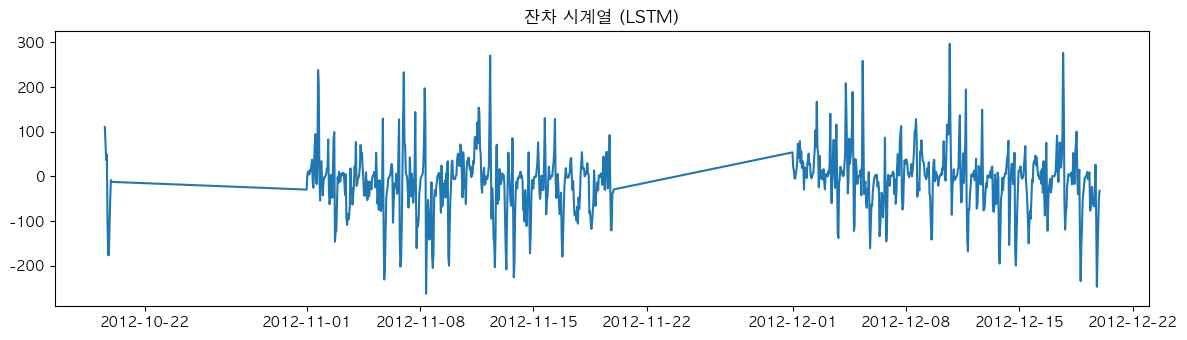

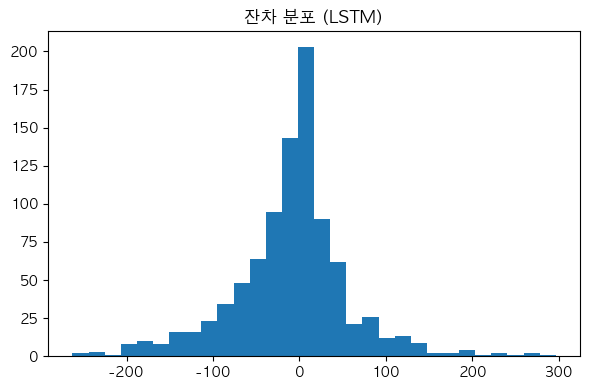

In [16]:
# -----------------------------
# Î°úÍ∑∏ Î≥ÄÌôòÎêú ÌÉÄÍπÉÏùÑ ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê
# -----------------------------
if 'use_log_target' in globals() and use_log_target:
    # Î°úÍ∑∏ Î≥ÄÌôò Ï†Ñ Í∞íÏúºÎ°ú Î≥µÏõê (expm1 = exp(x) - 1)
    yva_true = np.expm1(yva_seq.squeeze(-1))   # Í≤ÄÏ¶ù Ïã§Ï†úÍ∞í
    yte_true = np.expm1(yte_seq.squeeze(-1))   # ÌÖåÏä§Ìä∏ Ïã§Ï†úÍ∞í
    val_pred_eval = np.expm1(val_pred)         # Í≤ÄÏ¶ù ÏòàÏ∏°Í∞í
    test_pred_eval = np.expm1(test_pred)       # ÌÖåÏä§Ìä∏ ÏòàÏ∏°Í∞í
else:
    # Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÎã§Î©¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    yva_true = yva_seq.squeeze(-1)
    yte_true = yte_seq.squeeze(-1)
    val_pred_eval = val_pred
    test_pred_eval = test_pred


# -----------------------------
# ÏÑ±Îä• ÌèâÍ∞Ä (Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏)
# -----------------------------
print('LSTM/VAL', compute_metrics(yva_true, val_pred_eval))   # Í≤ÄÏ¶ù ÏÑ±Îä•
print('LSTM/TEST', compute_metrics(yte_true, test_pred_eval)) # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
# ‚Üí MAE, MSE, RMSE, R¬≤ Ï∂úÎ†•


# -----------------------------
# ÏûîÏ∞® Î∂ÑÏÑù (Residual Analysis)
# -----------------------------
# Ïã§Ï†úÍ∞í - ÏòàÏ∏°Í∞í = ÏûîÏ∞®
residual = yte_true - test_pred_eval

# 1) ÏûîÏ∞® ÏãúÍ≥ÑÏó¥ ÌîåÎ°Ø
plt.figure(figsize=(12,3.5))
plt.plot(test_idx, residual)
plt.title('ÏûîÏ∞® ÏãúÍ≥ÑÏó¥ (LSTM)')
plt.tight_layout()
plt.show()
# ‚Üí ÏãúÍ∞ÑÏóê Îî∞Îùº ÏûîÏ∞®Í∞Ä Ìå®ÌÑ¥ ÏóÜÏù¥ ÎûúÎç§ÌïòÍ≤å Î∂ÑÌè¨ÌïòÎ©¥ Î™®Îç∏ Ï†ÅÌï©Ïù¥ ÏñëÌò∏
# ‚Üí ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑú Ìé∏Ìñ•Ïù¥ ÎÇòÌÉÄÎÇòÎ©¥ Ìï¥Îãπ ÏãúÏ†ê Ìå®ÌÑ¥ÏùÑ Î™®Îç∏Ïù¥ ÌïôÏäµ Î™ªÌñàÏùÑ Í∞ÄÎä•ÏÑ±

# 2) ÏûîÏ∞® Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(6,4))
plt.hist(residual, bins=30)
plt.title('ÏûîÏ∞® Î∂ÑÌè¨ (LSTM)')
plt.tight_layout()
plt.show()
# ‚Üí ÏûîÏ∞®Í∞Ä 0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ Ï¢Ö Î™®ÏñëÏù¥Î©¥ Ïù¥ÏÉÅÏ†Å
# ‚Üí ÏπòÏö∞Ïπ®(skew)Ïù¥ÎÇò Íº¨Î¶¨(tail)Í∞Ä Í∏∏Î©¥ ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑú ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÌÅº



### 4-4 LSTM ÏûîÏ∞® Î∂ÑÏÑù Í≤∞Í≥º

---

#### 1) ÏûîÏ∞® ÏãúÍ≥ÑÏó¥ (Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ)  
- ÏûîÏ∞®Í∞Ä **0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÏúÑÏïÑÎûòÎ°ú ÏöîÎèô**Ìï®.  
- ÌäπÏ†ï ÏãúÏ†ê(Ïòà: 11Ïõî Ï¥à, 12Ïõî Ï¥à)Ïóê **ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÌÅ¨Í≤å ÌäÄÎäî Íµ¨Í∞Ñ** Ï°¥Ïû¨ ‚Üí Î™®Îç∏Ïù¥ ÌäπÏàò Ïù¥Î≤§Ìä∏(ÎÇ†Ïî® Í∏âÎ≥Ä, Ìú¥Ïùº, ÌîÑÎ°úÎ™®ÏÖò Îì±)Î•º Î∞òÏòÅÌïòÏßÄ Î™ªÌñàÏùÑ Í∞ÄÎä•ÏÑ±.  
- ÏûîÏ∞®Í∞Ä ÏôÑÏ†ÑÌûà ÎûúÎç§ÌïòÏßÄ ÏïäÍ≥† Íµ¨Í∞ÑÎ≥ÑÎ°ú Î¨∂Ïó¨ Î≥¥ÏûÑ ‚Üí ÏãúÍ≥ÑÏó¥Ï†Å Ìå®ÌÑ¥(Ï£ºÍ∞Ñ/ÏöîÏùº Ìö®Í≥º Îì±)ÏùÑ Ï∂©Î∂ÑÌûà ÌïôÏäµÌïòÏßÄ Î™ªÌñàÏùåÏùÑ ÏãúÏÇ¨.  

---

#### 2) ÏûîÏ∞® Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû® (Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ)  
- **0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ìïú Ï¢åÏö∞ ÎåÄÏπ≠ Ï¢Ö Î™®Ïñë(Ï†ïÍ∑úÎ∂ÑÌè¨Ìòï)**Ïóê Í∞ÄÍπåÏõÄ.  
- Íº¨Î¶¨Í∞Ä Îã§ÏÜå ÎëêÍ∫ºÏõÄ(¬±200 Ïù¥ÏÉÅ Íµ¨Í∞ÑÏóêÎèÑ ÏûîÏ∞® Ï°¥Ïû¨) ‚Üí ÌäπÏ†ï extreme outlier ÏÉÅÌô©ÏóêÏÑú ÌÅ∞ Ïò§Ï∞® Î∞úÏÉù.  
- Ï§ëÏïôÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä Î™∞Î†§ ÏûàÏùå ‚Üí ÎåÄÎ∂ÄÎ∂Ñ Íµ¨Í∞ÑÏóêÏÑúÎäî ÏòàÏ∏° Ï†ïÌôïÎèÑÍ∞Ä Í¥úÏ∞ÆÏùå.  

---

#### 3) Ï¢ÖÌï© Ìï¥ÏÑù  
- **Ïû•Ï†ê**  
  - ÌèâÍ∑†Ï†ÅÏúºÎ°úÎäî ÏòàÏ∏°ÏùÑ ÏûòÌï® (ÏûîÏ∞®Í∞Ä 0 Í∑ºÏ≤òÏóê ÏßëÏ§ë).  
  - Ï¢åÏö∞ ÎåÄÏπ≠ Î∂ÑÌè¨ ‚Üí Ï≤¥Í≥ÑÏ†ÅÏù∏ Ìé∏Ìñ•(bias)ÏùÄ ÌÅ¨ÏßÄ ÏïäÏùå.  

- **ÌïúÍ≥Ñ**  
  - ÌäπÏ†ï Í∏∞Í∞Ñ(Ïù¥Î≤§Ìä∏ÏÑ± ÎÇ†Ïî®, Ìú¥Ïùº Îì±)ÏóêÏÑú Ïò§Ï∞®Í∞Ä ÌÅ¨Í≤å Î∞úÏÉù.  
  - ÏûîÏ∞®Í∞Ä Î∞±ÏÉâÏû°Ïùå(white noise) ÏàòÏ§ÄÏùÄ ÏïÑÎãò ‚Üí Ìå®ÌÑ¥Ïù¥ ÎÇ®ÏïÑ ÏûàÏùå.  



